In [1]:
print('Importing Required Libraries')

Importing Required Libraries


In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats
import statsmodels.api as sm

# Time series analysis
from statsmodels.tsa.stattools import adfuller
import statsmodels.graphics.tsaplots as tsaplots

# Change point detection
import ruptures

# Forecasting models
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Other
import warnings
warnings.filterwarnings("ignore")


In [3]:
print('checking .csv file and columns')
df = pd.read_csv('retail_sales_dataset.csv')
print(df.head())

checking .csv file and columns
   Transaction ID        Date Customer ID  Gender   Age Product Category  \
0               1  11/24/2023     CUST001    Male  34.0           Beauty   
1               2   2/27/2023     CUST002  Female  26.0         Clothing   
2               3   1/13/2023     CUST003    Male  50.0      Electronics   
3               4   5/21/2023     CUST004    Male  37.0         Clothing   
4               5    5/6/2023     CUST005    Male  30.0           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [4]:
print('Preforming Data Cleaning')
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Preforming Data Cleaning
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
Number of duplicate rows: 0


In [5]:
print('Descriptive Data in text')
# Descriptive statistics for Total Amount
total_amount_stats = df['Total Amount'].describe()

# Descriptive statistics for Price per Unit
price_stats = df['Price per Unit'].describe()

# Descriptive statistics for Quantity
quantity_stats = df['Quantity'].describe()

# Print descriptive statistics for Total Amount
print("Descriptive Statistics for Total Amount:")
print(total_amount_stats)
print()

# Print descriptive statistics for Price per Unit
print("Descriptive Statistics for Price per Unit:")
print(price_stats)
print()

# Print descriptive statistics for Quantity
print("Descriptive Statistics for Quantity:")
print(quantity_stats)

Descriptive Data in text
Descriptive Statistics for Total Amount:
count    1000.000000
mean      456.000000
std       559.997632
min        25.000000
25%        60.000000
50%       135.000000
75%       900.000000
max      2000.000000
Name: Total Amount, dtype: float64

Descriptive Statistics for Price per Unit:
count    1000.000000
mean      179.890000
std       189.681356
min        25.000000
25%        30.000000
50%        50.000000
75%       300.000000
max       500.000000
Name: Price per Unit, dtype: float64

Descriptive Statistics for Quantity:
count    1000.000000
mean        2.514000
std         1.132734
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: Quantity, dtype: float64


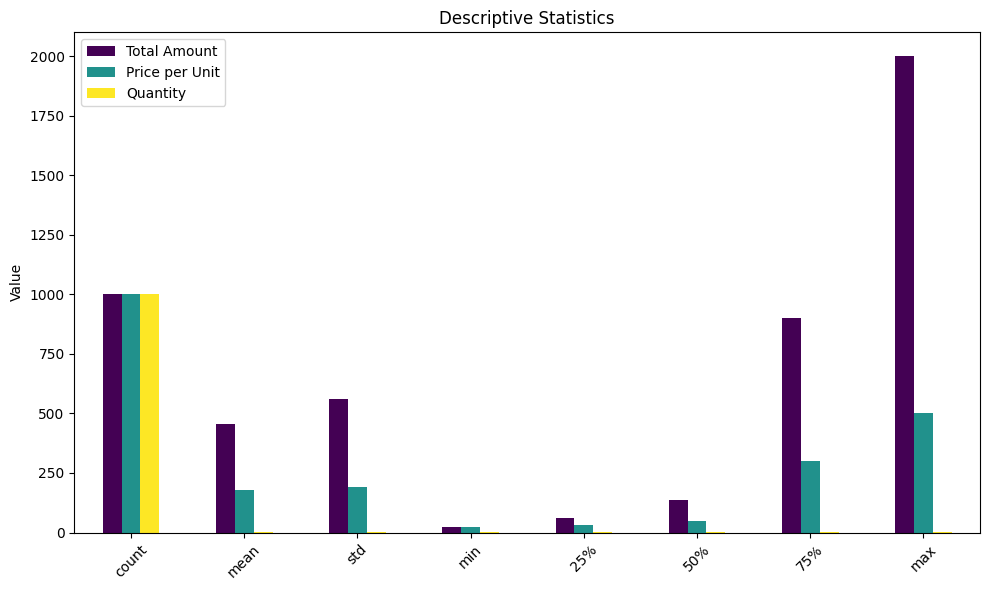

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Descriptive statistics data
descriptive_data = {
    'Total Amount': total_amount_stats,
    'Price per Unit': price_stats,
    'Quantity': quantity_stats
}

# Convert descriptive data to a DataFrame
df_descriptive = pd.DataFrame(descriptive_data)

# Plotting descriptive statistics
ax = df_descriptive.plot(kind='bar', figsize=(10, 6), colormap='viridis')
ax.set_title('Descriptive Statistics')
ax.set_ylabel('Value')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

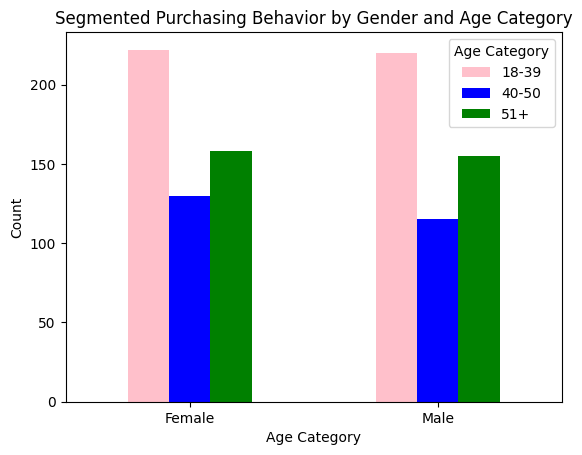

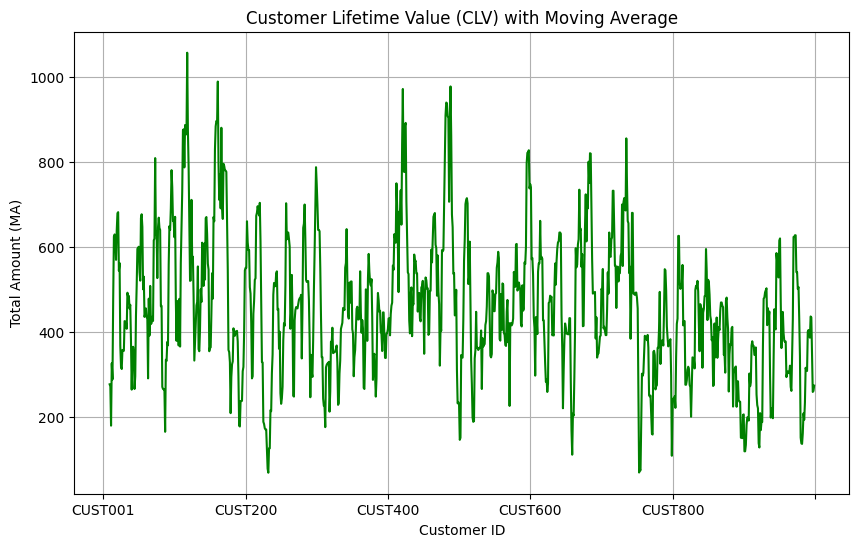

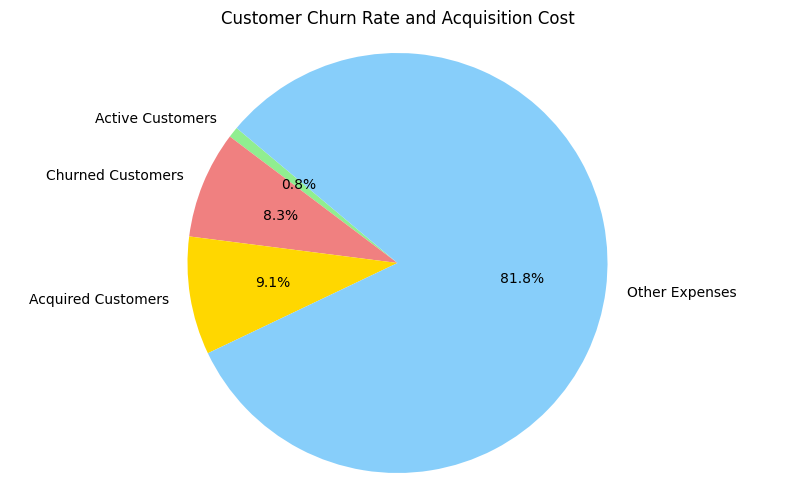

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('retail_sales_dataset.csv')
# Segment customers based on demographics
customer_segments = df.groupby(['Gender', 'Age'])
# Convert 'Date' column to datetime data type
df['Date'] = pd.to_datetime(df['Date'])


# Segment customers based on demographics
df['Age Category'] = pd.cut(df['Age'], bins=[17, 39, 50, df['Age'].max()], labels=['18-39', '40-50', '51+'])
customer_segments = df.groupby(['Gender', 'Age Category']).size().unstack()

# Plot segmented purchasing behavior (bar chart)
plt.figure(figsize=(10, 6))
customer_segments.plot(kind='bar', color=['pink', 'blue','green'])
plt.title('Segmented Purchasing Behavior by Gender and Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Age Category')
plt.show()

# Calculate Customer Lifetime Value (CLV)
clv = df.groupby('Customer ID')['Total Amount'].sum()

# Calculate moving average for CLV
clv_ma = clv.rolling(window=10).mean()  # Adjust window size as needed

# Plot CLV with moving average (line chart)
plt.figure(figsize=(10, 6))
clv_ma.plot(color='green')
plt.title('Customer Lifetime Value (CLV) with Moving Average')
plt.xlabel('Customer ID')
plt.ylabel('Total Amount (MA)')
plt.grid(True)
plt.show()

# Calculate Customer Churn Rate
churn_period = 30  # Example: 30 days
last_purchase_date = df['Date'].max()
churn_date = last_purchase_date - pd.Timedelta(days=churn_period)
active_customers = df[df['Date'] >= churn_date]['Customer ID'].nunique()
total_customers = df['Customer ID'].nunique()
churn_rate = (total_customers - active_customers) / total_customers

# Calculate Customer Acquisition Cost (CAC)
marketing_expenses = 10000  # Example: $10,000
new_customers_acquired = df[df['Date'] >= pd.Timestamp('2023-01-01')]['Customer ID'].nunique()
cac = marketing_expenses / new_customers_acquired

# Plot Customer Churn Rate and CAC (combined pie chart)
labels = ['Active Customers', 'Churned Customers', 'Acquired Customers', 'Other Expenses']
sizes = [active_customers, total_customers - active_customers, new_customers_acquired, marketing_expenses - new_customers_acquired]
colors = ['lightgreen', 'lightcoral', 'gold', 'lightskyblue']
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Customer Churn Rate and Acquisition Cost')
plt.axis('equal')
plt.show()

Time analysistics for Prediction of Trends


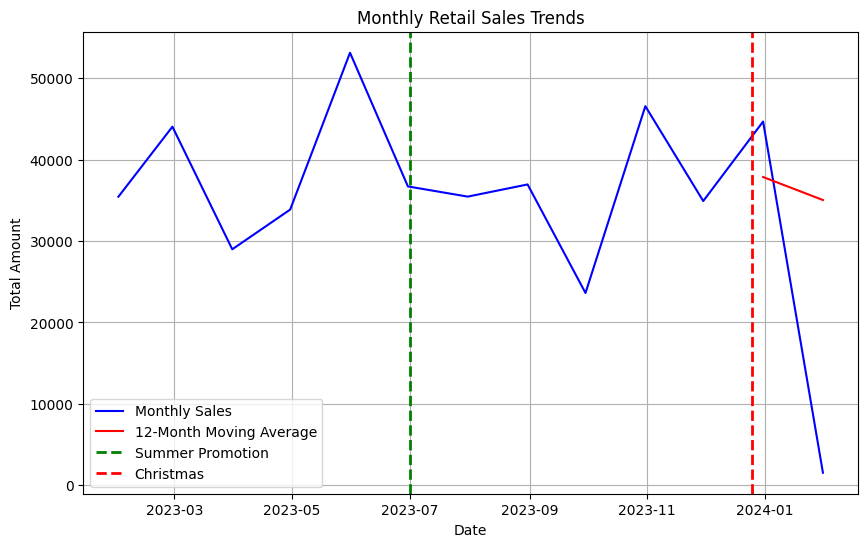

In [8]:
print('Time analysistics for Prediction of Trends')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

# Step 1: Data Preparation
# Assuming 'retail_sales_dataset.csv' contains the sales data with 'Date' and 'Total Amount' columns
df = pd.read_csv('retail_sales_dataset.csv', parse_dates=['Date'], index_col='Date')

# Step 2: Data Aggregation
monthly_sales = df.resample('ME')['Total Amount'].sum()

# Step 3: Smoothing with Moving Average
rolling_mean = monthly_sales.rolling(window=12).mean()

# Step 4: Data Visualization
plt.figure(figsize=(10, 6))

# Plot actual monthly sales
plt.plot(monthly_sales.index, monthly_sales, color='blue', label='Monthly Sales')

# Plot smoothed trend (moving average)
plt.plot(rolling_mean.index, rolling_mean, color='red', label='12-Month Moving Average')

# Highlight key events or promotions (add additional annotations as needed)
plt.axvline(pd.Timestamp('2023-07-01'), color='green', linestyle='--', linewidth=2, label='Summer Promotion')
plt.axvline(pd.Timestamp('2023-12-25'), color='red', linestyle='--', linewidth=2, label='Christmas')

plt.title('Monthly Retail Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.grid(True)
plt.show()




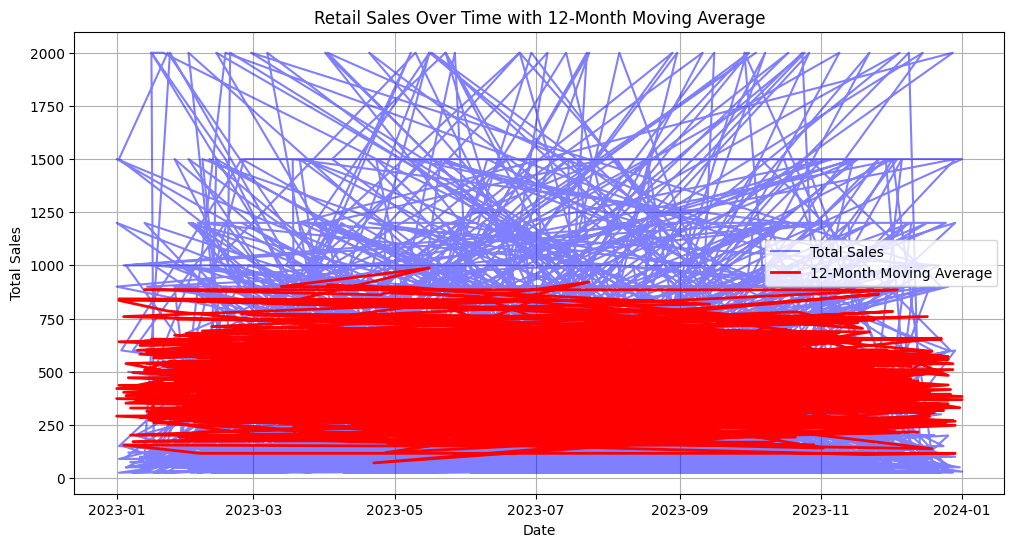

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Data
df = pd.read_csv('retail_sales_dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Step 2: Calculate 12-Month Moving Average
rolling_avg = df['Total Amount'].rolling(window=12).mean()

# Step 3: Plotting
plt.figure(figsize=(12, 6))

# Plot the original sales data
plt.plot(df.index, df['Total Amount'], label='Total Sales', color='blue', alpha=0.5)

# Plot the 12-month moving average starting from the 12th month
plt.plot(rolling_avg.index[11:], rolling_avg[11:], label='12-Month Moving Average', color='red', linewidth=2)

plt.title('Retail Sales Over Time with 12-Month Moving Average')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()


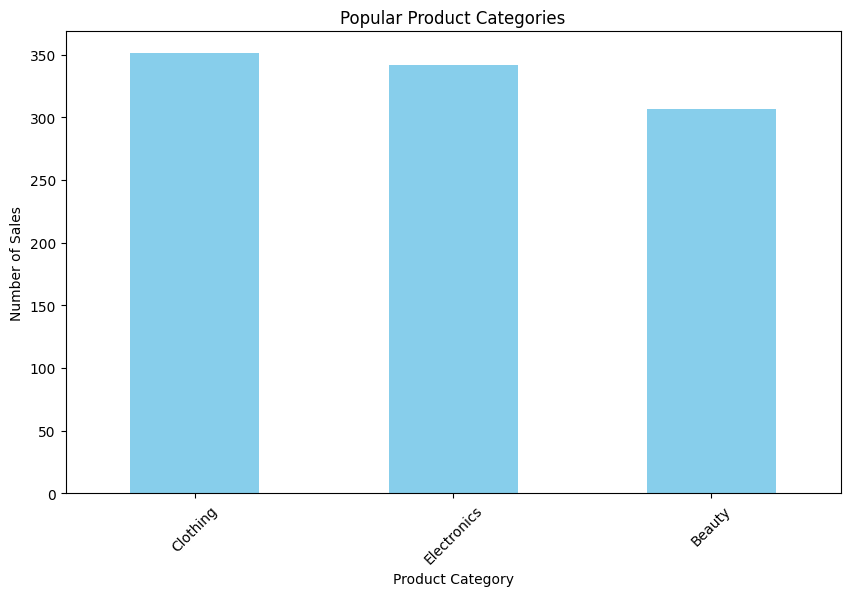

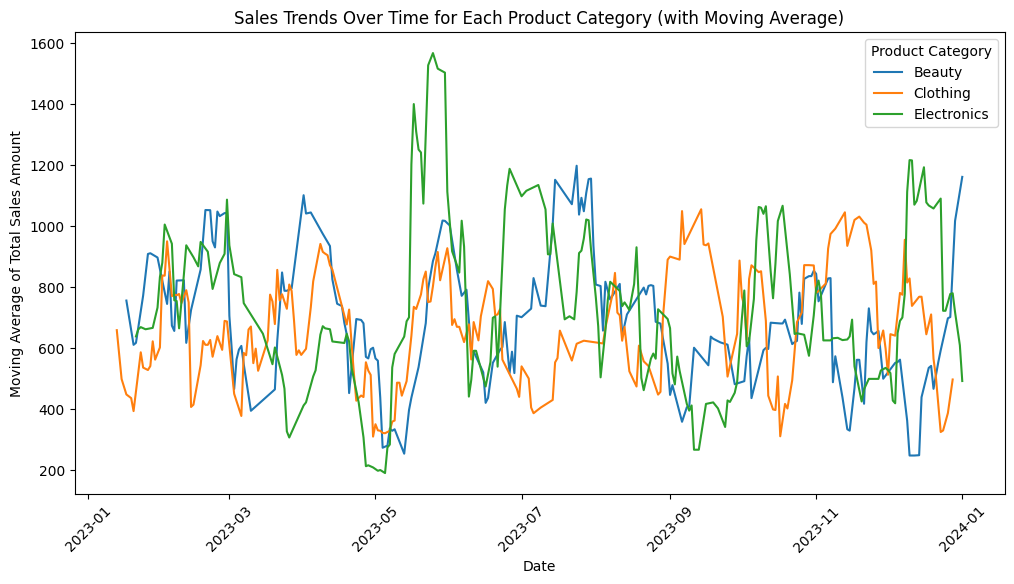

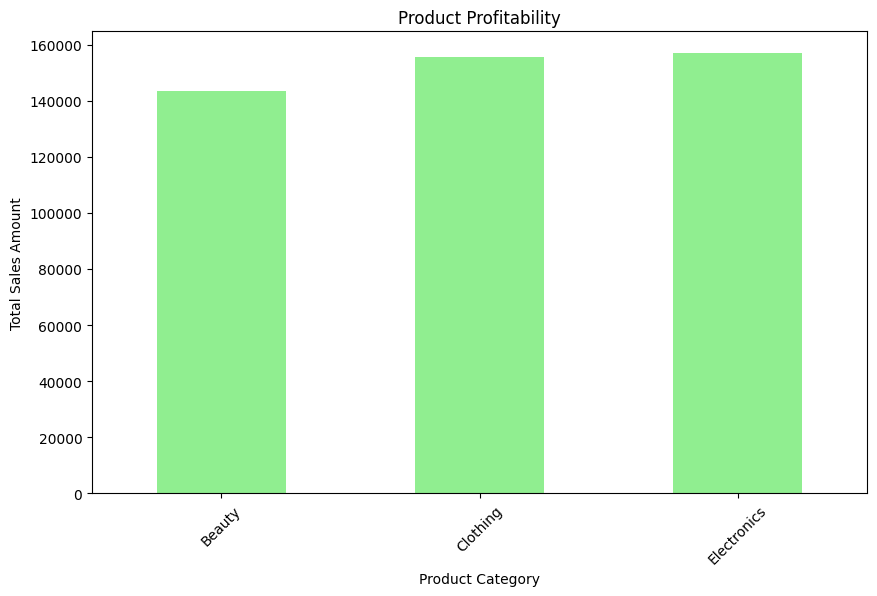

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('retail_sales_dataset.csv')

# Convert 'Date' column to datetime data type
df['Date'] = pd.to_datetime(df['Date'])

# Identify popular product categories
popular_products = df['Product Category'].value_counts().nlargest(5)

# Plot popular product categories (bar chart)
plt.figure(figsize=(10, 6))
popular_products.plot(kind='bar', color='skyblue')
plt.title('Popular Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

# Analyze sales trends over time for each product category with moving average
plt.figure(figsize=(12, 6))
for category in df['Product Category'].unique():
    category_sales = df[df['Product Category'] == category].groupby('Date')['Total Amount'].sum().reset_index()
    category_sales['Moving Average'] = category_sales['Total Amount'].rolling(window=10).mean()
    sns.lineplot(data=category_sales, x='Date', y='Moving Average', label=category)
plt.title('Sales Trends Over Time for Each Product Category (with Moving Average)')
plt.xlabel('Date')
plt.ylabel('Moving Average of Total Sales Amount')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()

# Calculate product profitability
product_profitability = df.groupby('Product Category')['Total Amount'].sum()

# Plot product profitability (bar chart)
plt.figure(figsize=(10, 6))
product_profitability.plot(kind='bar', color='lightgreen')
plt.title('Product Profitability')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

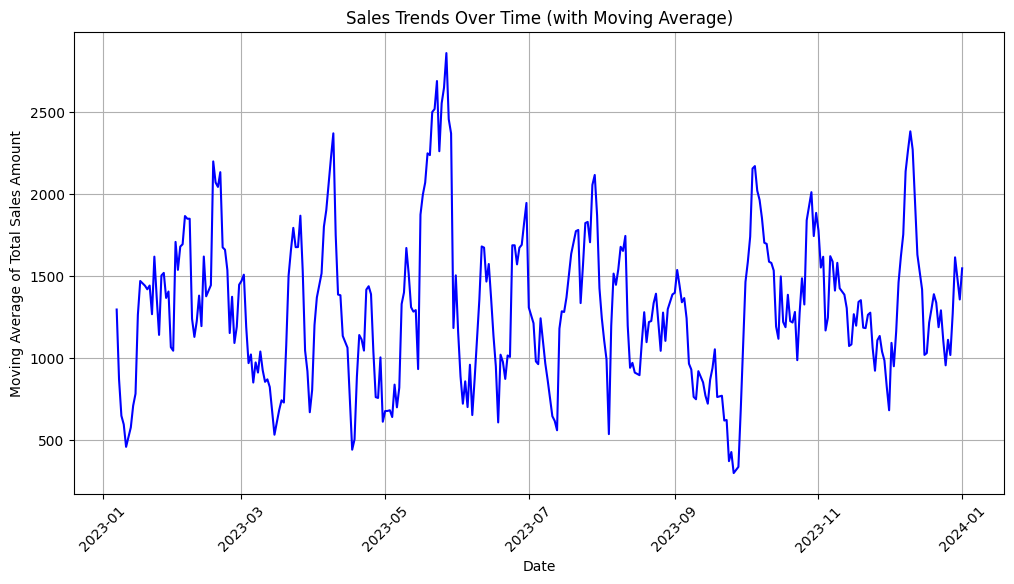

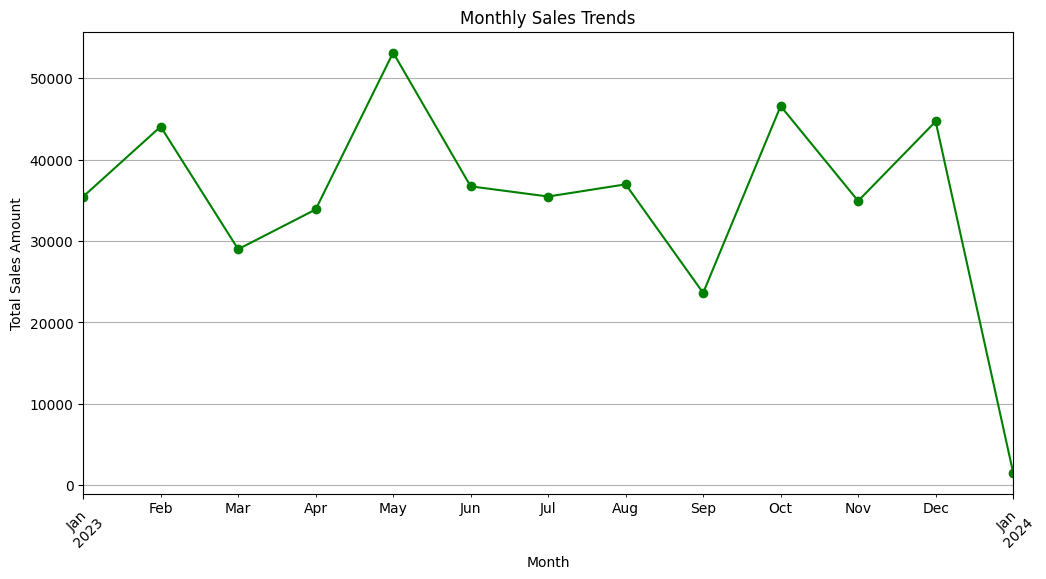

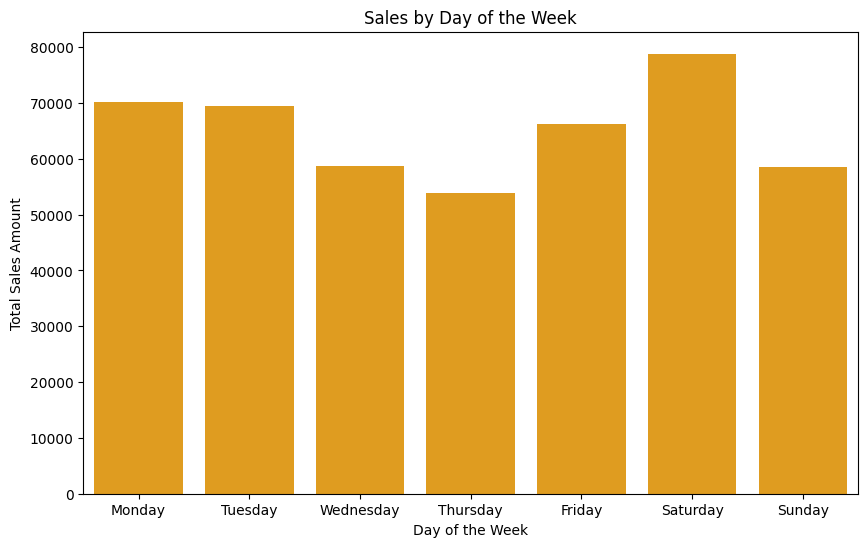

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('retail_sales_dataset.csv')

# Convert 'Date' column to datetime data type
df['Date'] = pd.to_datetime(df['Date'])

# Calculate total sales amount for each day
daily_sales = df.groupby('Date')['Total Amount'].sum()

# Plot sales trends over time with moving average
plt.figure(figsize=(12, 6))
daily_sales_ma = daily_sales.rolling(window=7).mean()  # 7-day moving average for smoother visualization
plt.plot(daily_sales_ma, color='blue')
plt.title('Sales Trends Over Time (with Moving Average)')
plt.xlabel('Date')
plt.ylabel('Moving Average of Total Sales Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Identify seasonal patterns using monthly sales data
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Total Amount'].sum()

# Plot monthly sales trends
plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o', color='green')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Identify peak sales periods (e.g., by day of the week)
df['Day of Week'] = df['Date'].dt.dayofweek
day_of_week_sales = df.groupby('Day of Week')['Total Amount'].sum()

# Plot sales by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_sales.index, y=day_of_week_sales.values, color='orange')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales Amount')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()



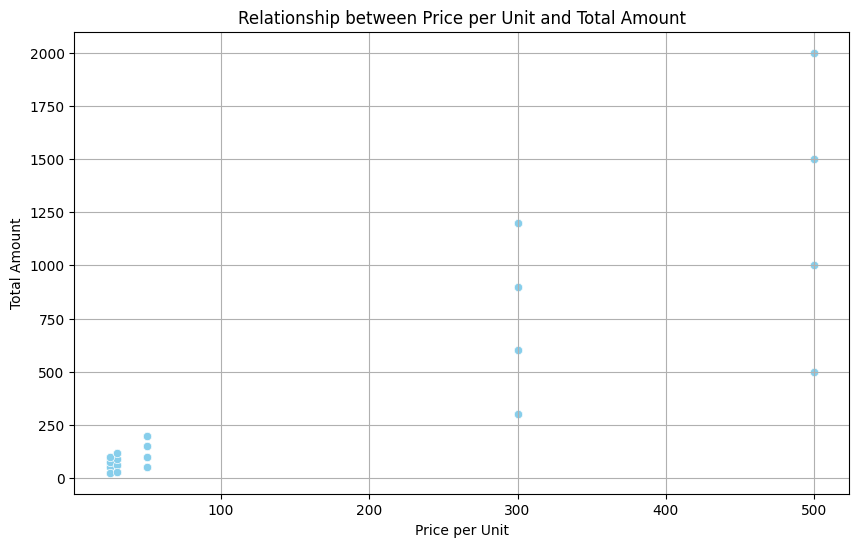

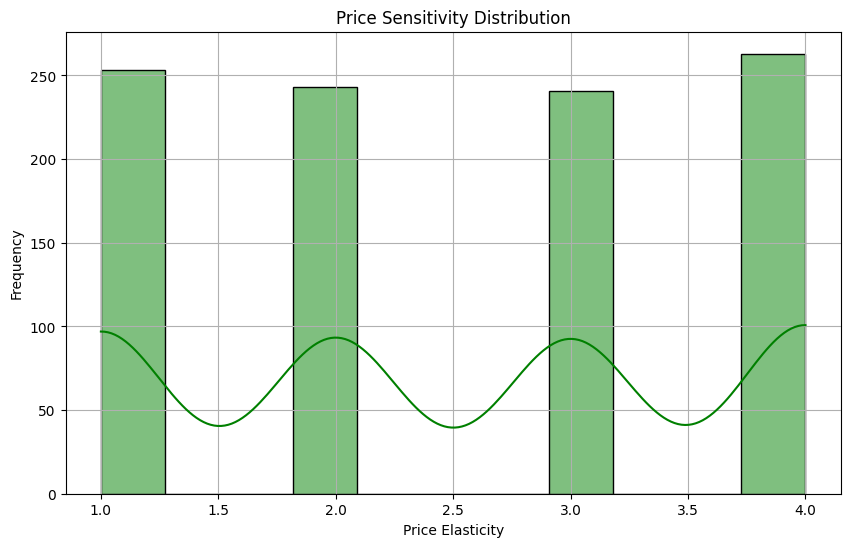

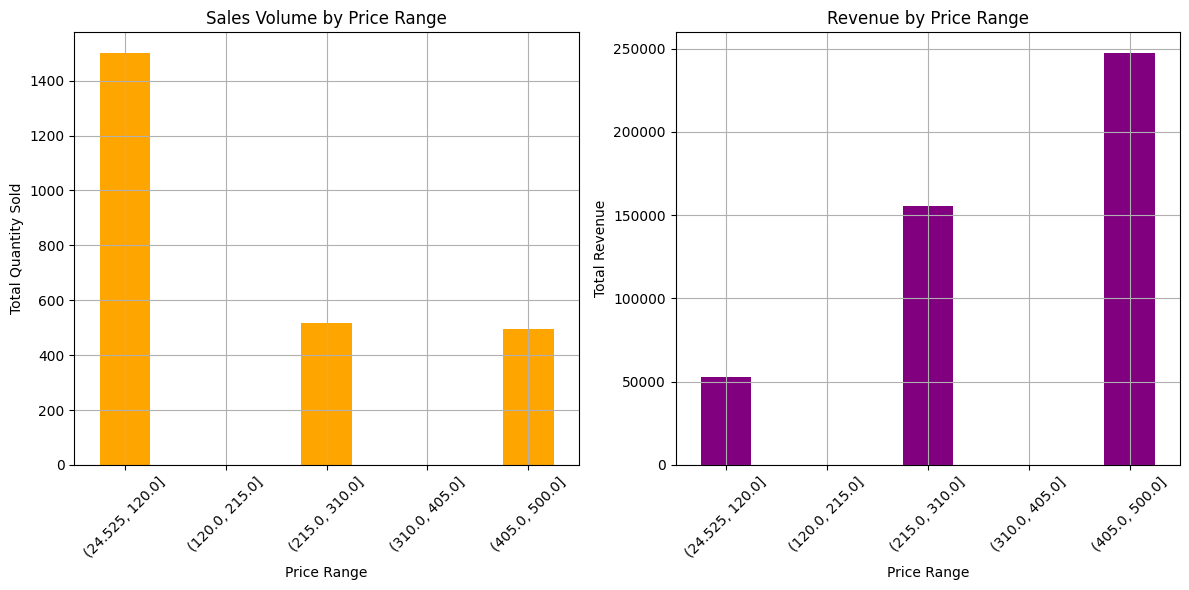

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('retail_sales_dataset.csv')

# Analyze the relationship between Price per Unit and Total Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price per Unit', y='Total Amount', color='skyblue')
plt.title('Relationship between Price per Unit and Total Amount')
plt.xlabel('Price per Unit')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

# Calculate price sensitivity (price elasticity)
df['Price Elasticity'] = df['Total Amount'] / df['Price per Unit']

# Plot price sensitivity distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price Elasticity'], kde=True, color='green')
plt.title('Price Sensitivity Distribution')
plt.xlabel('Price Elasticity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Analyze the impact of pricing on sales volume and revenue
# For example, you could compare sales volume and revenue for different price ranges
price_ranges = pd.cut(df['Price per Unit'], bins=5)
price_analysis = df.groupby(price_ranges).agg({'Quantity': 'sum', 'Total Amount': 'sum'})

# Plot sales volume and revenue by price range
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
price_analysis['Quantity'].plot(kind='bar', color='orange')
plt.title('Sales Volume by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(1, 2, 2)
price_analysis['Total Amount'].plot(kind='bar', color='purple')
plt.title('Revenue by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


Mean Squared Error: 291966.7692598732


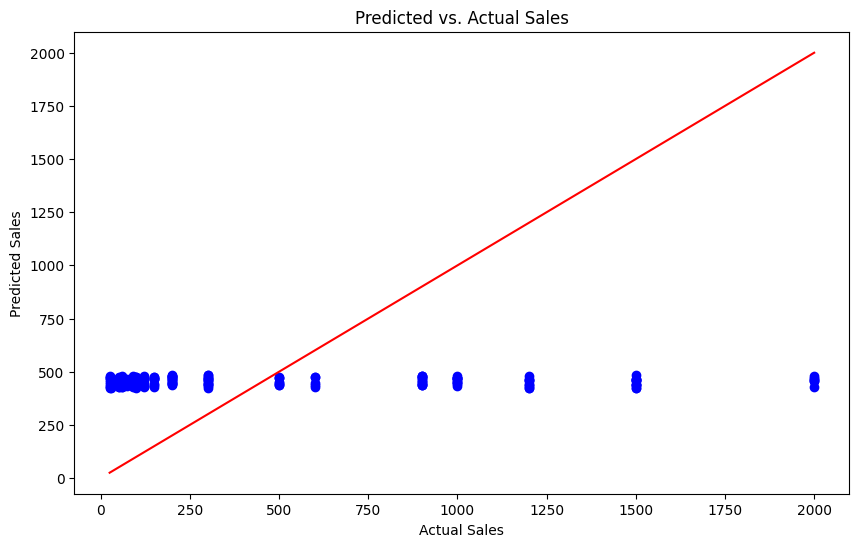

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv('retail_sales_dataset.csv')


# Preprocess the 'Date' column
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Selecting features for prediction
X = df[['Year', 'Month', 'Day']]
y = df['Total Amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict sales for the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualize the predicted vs. actual sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Predicted vs. Actual Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


AttributeError: 'Series' object has no attribute 'columns'

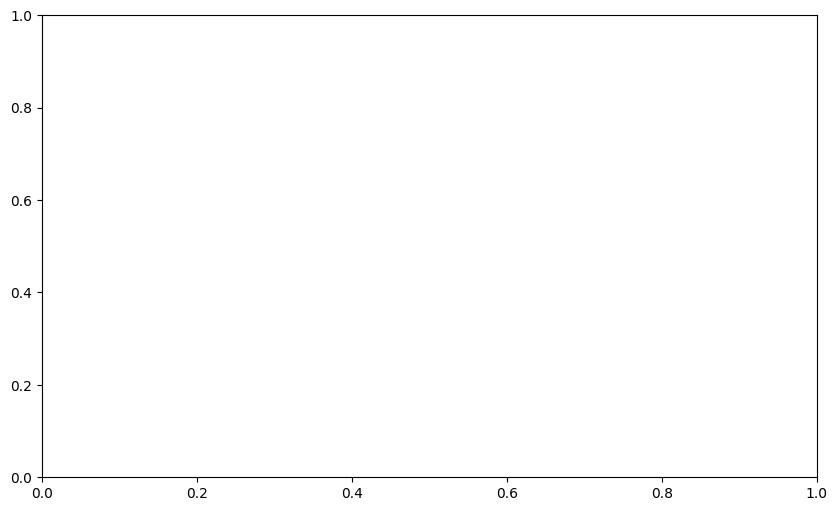

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('retail_sales_dataset.csv')

# Group the data by 'Product Category', 'Gender', and 'Age', and count the number of transactions
grouped_data = df.groupby(['Product Category', 'Gender', 'Age']).size().unstack().fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Getting unique ages for plotting on the x-axis
ages = df['Age'].unique()

# Define colors for genders
colors = {'Male': 'blue', 'Female': 'pink'}

# Plotting stacked bars for each product category
for i, category in enumerate(grouped_data.index):
    gender_counts = grouped_data.loc[category]
    ax.bar(ages + i * 0.2, gender_counts.values.T, width=0.2, label=category, color=[colors.get(g, 'gray') for g in gender_counts.columns])

# Set labels and legend
ax.set_xlabel('Age')
ax.set_ylabel('Number of Transactions')
ax.set_title('Number of Transactions by Product Category, Gender, and Age')
ax.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(ages)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the retail sales dataset
df = pd.read_csv('retail_sales_dataset.csv')

# Select only the required columns
df = df[['Gender', 'Age', 'Product Category']]

# Define the bins for age groups
bins = [18, 40, 50, float('inf')]
labels = ['18-39', '40-49', '50+']

# Categorize the 'Age' column into age groups
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group the data by 'Gender', 'Age Group', and 'Product Category' and count the number of transactions
grouped_data = df.groupby(['Gender', 'Age', 'Product Category']).size().unstack(fill_value=0)

# Normalize the counts to get percentages
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Get unique ages for plotting on the x-axis
ages = pd.unique(df['Age'])

# Define colors for product categories
colors = {'Beauty': 'lightpink', 'Clothing': 'lightblue', 'Electronics': 'lightgreen'}

# Iterate over each gender
for gender, gender_data in grouped_data.groupby(level=0):
    # Iterate over each age group within the gender
    for age_group, data in gender_data.groupby(level=1):
        # Plot stacked bars for each product category
        for i, (product_category, values) in enumerate(data.iterrows()):
            # Convert categorical ages to numerical representation
            age_position = ages.tolist().index(age_group) + i * 0.2
            ax.bar(
                age_position,  # Shift bars horizontally
                values,
                width=0.2,
                label=f'{product_category} - {gender}',
                color=colors[product_category],
                alpha=0.7,  # Set transparency
            )

# Set labels and legend
ax.set_xlabel('Age Group')
ax.set_ylabel('Percentage of Transactions')
ax.set_title('Percentage of Transactions by Product Category and Age Group for Each Gender')
ax.legend(title='Product Category')

plt.xticks(range(len(ages)), ages)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the retail sales dataset
df = pd.read_csv('retail_sales_dataset.csv')

# Select only the required columns
df = df[['Gender', 'Age', 'Product Category']]

# Define the bins for age groups
bins = [18, 40, 50, float('inf')]
labels = ['18-39', '40-49', '50+']

# Categorize the 'Age' column into age groups
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group the data by 'Gender', 'Age Group', and 'Product Category' and count the number of transactions
grouped_data = df.groupby(['Gender', 'Age Group', 'Product Category']).size().unstack(fill_value=0)

# Normalize the counts to get percentages
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Get unique ages for plotting on the x-axis
ages = pd.unique(df['Age Group'])

# Define colors for product categories
colors = {'Beauty': 'lightpink', 'Clothing': 'lightblue', 'Electronics': 'lightgreen'}

# Iterate over each gender
for gender, gender_data in grouped_data.groupby(level=0):
    # Iterate over each age group within the gender
    for age_group, data in gender_data.groupby(level=1):
        # Get the corresponding color for the age group
        age_color = colors[age_group]
        # Plot stacked bars for each product category
        for i, (product_category, values) in enumerate(data.iterrows()):
            # Convert categorical ages to numerical representation
            age_position = ages.tolist().index(age_group) + i * 0.2
            ax.bar(
                age_position,  # Shift bars horizontally
                values,
                width=0.2,
                label=f'{product_category} - {gender}',
                color=age_color,
                alpha=0.7,  # Set transparency
            )

# Set labels and legend
ax.set_xlabel('Age Group')
ax.set_ylabel('Percentage of Transactions')
ax.set_title('Percentage of Transactions by Product Category and Age Group for Each Gender')
ax.legend(title='Product Category')

plt.xticks(range(len(ages)), ages)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the retail sales dataset
df = pd.read_csv('retail_sales_dataset.csv')

# Select only the required columns
df = df[['Gender', 'Age', 'Product Category']]

# Define the bins for age groups
bins = [18, 40, 50, float('inf')]
labels = ['18-39', '40-49', '50+']

# Categorize the 'Age' column into age groups
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group the data by 'Gender', 'Age Group', and 'Product Category' and count the number of transactions
grouped_data = df.groupby(['Gender', 'Age Group', 'Product Category']).size().unstack(fill_value=0)

# Normalize the counts to get percentages
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Get unique ages for plotting on the x-axis
ages = pd.unique(df['Age Group'])

# Define colors for product categories
colors = {'Beauty': 'lightpink', 'Clothing': 'lightblue', 'Electronics': 'lightgreen'}

# Iterate over each gender
for gender, gender_data in grouped_data.groupby(level=0):
    # Iterate over each age group within the gender
    for age_group, data in gender_data.groupby(level=1):
        # Plot stacked bars for each product category
        for i, (product_category, values) in enumerate(data.iterrows()):
            # Convert categorical ages to numerical representation
            age_position = ages.tolist().index(age_group) + i * 0.2
            ax.bar(
                age_position,  # Shift bars horizontally
                values,
                width=0.2,
                label=f'{product_category} - {gender}',
                color=colors[product_category],
                alpha=0.7,  # Set transparency
            )

# Set labels and legend
ax.set_xlabel('Age Group')
ax.set_ylabel('Percentage of Transactions')
ax.set_title('Percentage of Transactions by Product Category and Age Group for Each Gender')
ax.legend(title='Product Category')

plt.xticks(range(len(ages)), ages)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the retail sales dataset
df = pd.read_csv('retail_sales_dataset.csv')

# Select only the required columns
df = df[['Gender', 'Age', 'Product Category']]

# Define the bins for age groups
bins = [18, 40, 50, float('inf')]
labels = ['18-39', '40-49', '50+']

# Categorize the 'Age' column into age groups
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Define colors for product categories
colors = {'Beauty': 'lightpink', 'Clothing': 'lightblue', 'Electronics': 'lightgreen'}

# Add a new column to the DataFrame to represent color
df['Color'] = df['Product Category'].map(colors)

# Group the data by 'Gender', 'Age Group', and 'Product Category' and count the number of transactions
grouped_data = df.groupby(['Gender', 'Age Group', 'Product Category']).size().unstack(fill_value=0)

# Normalize the counts to get percentages
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Get unique ages for plotting on the x-axis
ages = pd.unique(df['Age Group'])

# Iterate over each gender
for gender, gender_data in grouped_data.groupby(level=0):
    # Iterate over each age group within the gender
    for age_group, data in gender_data.groupby(level=1):
        # Plot stacked bars for each product category
        for i, (product_category, values) in enumerate(data.iterrows()):
            # Convert categorical ages to numerical representation
            age_position = ages.tolist().index(age_group) + i * 0.2
            ax.bar(
                age_position,  # Shift bars horizontally
                values,
                width=0.2,
                label=f'{product_category} - {gender}',
                color=values['Color'],
                alpha=0.7,  # Set transparency
            )

# Set labels and legend
ax.set_xlabel('Age Group')
ax.set_ylabel('Percentage of Transactions')
ax.set_title('Percentage of Transactions by Product Category and Age Group for Each Gender')
ax.legend(title='Product Category')

plt.xticks(range(len(ages)), ages)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the retail sales dataset
df = pd.read_csv('retail_sales_dataset.csv')

# Select only the required columns
df = df[['Gender', 'Age', 'Product Category']]

# Define the bins for age groups
bins = [18, 40, 50, float('inf')]
labels = ['18-39', '40-49', '50+']

# Categorize the 'Age' column into age groups
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Define colors for product categories
colors = {'Beauty': 'lightpink', 'Clothing': 'lightblue', 'Electronics': 'lightgreen'}

# Add a new column to the DataFrame to represent color
df['Color'] = df['Product Category'].map(colors)

# Group the data by 'Gender', 'Age Group', and 'Product Category' and count the number of transactions
grouped_data = df.groupby(['Gender', 'Age Group', 'Product Category']).size().unstack(fill_value=0)

# Normalize the counts to get percentages
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Get unique ages for plotting on the x-axis
ages = pd.unique(df['Age Group'])

# Iterate over each gender
for gender, gender_data in grouped_data.groupby(level=0):
    # Iterate over each age group within the gender
    for age_group, data in gender_data.groupby(level=1):
        # Plot stacked bars for each product category
        for i, (product_category, values) in enumerate(data.iterrows()):
            # Convert categorical ages to numerical representation
            age_position = ages.tolist().index(age_group) + i * 0.2
            ax.bar(
                age_position,  # Shift bars horizontally
                values,
                width=0.2,
                label=f'{product_category} - {gender}',
                color=colors[product_category],
                alpha=0.7,  # Set transparency
            )

# Set labels and legend
ax.set_xlabel('Age Group')
ax.set_ylabel('Percentage of Transactions')
ax.set_title('Percentage of Transactions by Product Category and Age Group for Each Gender')
ax.legend(title='Product Category')

plt.xticks(range(len(ages)), ages)
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the retail sales dataset
df = pd.read_csv('retail_sales_dataset.csv')

# Select only the required columns
df = df[['Gender', 'Age', 'Product Category']]

# Define the bins for age groups
bins = [18, 40, 50, float('inf')]
labels = ['18-39', '40-49', '50+']

# Categorize the 'Age' column into age groups
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Define colors for product categories
colors = {'Beauty': 'lightpink', 'Clothing': 'lightblue', 'Electronics': 'lightgreen'}

# Add a new column to the DataFrame to represent color
df['Color'] = df['Product Category'].map(colors)

# Group the data by 'Gender', 'Age Group', and 'Product Category' and count the number of transactions
grouped_data = df.groupby(['Gender', 'Age Group', 'Product Category']).size().unstack(fill_value=0)

# Normalize the counts to get percentages
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Get unique ages for plotting on the x-axis
ages = pd.unique(df['Age Group'])

# Iterate over each gender
for gender, gender_data in grouped_data.groupby(level=0):
    # Plotting
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Iterate over each age group within the gender
    for age_group, data in gender_data.groupby(level=1):
        # Plot stacked bars for each product category
        for i, (product_category, values) in enumerate(data.iterrows()):
            # Convert categorical ages to numerical representation
            age_position = ages.tolist().index(age_group) + i * 0.2
            ax.bar(
                age_position,  # Shift bars horizontally
                values,
                width=0.2,
                label=product_category,
                color=colors[product_category],
                alpha=0.7,  # Set transparency
            )

    # Set labels and legend
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Percentage of Transactions')
    ax.set_title(f'Percentage of Transactions by Product Category and Age Group for {gender}')
    ax.legend(title='Product Category')

    plt.xticks(range(len(ages)), ages)
    plt.tight_layout()
    plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the retail sales dataset
df = pd.read_csv('retail_sales_dataset.csv')

# Select only the required columns
df = df[['Gender', 'Age', 'Product Category']]

# Define the bins for age groups
bins = [18, 40, 50, float('inf')]
labels = ['18-39', '40-49', '50+']

# Categorize the 'Age' column into age groups
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Define colors for product categories
colors = {'Beauty': 'lightpink', 'Clothing': 'lightblue', 'Electronics': 'lightgreen'}

# Add a new column to the DataFrame to represent color
df['Color'] = df['Product Category'].map(colors)

# Group the data by 'Gender', 'Age Group', and 'Product Category' and count the number of transactions
grouped_data = df.groupby(['Gender', 'Age Group', 'Product Category']).size().unstack(fill_value=0)

# Normalize the counts to get percentages
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Get unique ages for plotting on the x-axis
ages = pd.unique(df['Age Group'])

# Iterate over each gender
for gender, gender_data in grouped_data.groupby(level=0):
    # Plotting
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Iterate over each age group within the gender
    for age_group, data in gender_data.groupby(level=1):
        # Plot stacked bars for each product category
        for i, (product_category, values) in enumerate(data.iterrows()):
            # Convert categorical ages to numerical representation
            age_position = ages.tolist().index(age_group) + i * 0.2
            ax.bar(
                age_position,  # Shift bars horizontally
                values,
                width=0.2,
                label=product_category,
                color=colors[product_category],
                alpha=0.7,  # Set transparency
            )

    # Set labels and legend
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Percentage of Transactions')
    ax.set_title(f'Percentage of Transactions by Product Category and Age Group for {gender}')
    ax.legend(title='Product Category')

    plt.xticks(range(len(ages)), ages)
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('retail_sales_dataset.csv')

# Filter out missing values
data = data.dropna()

# Convert 'Age' column to numeric if needed
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Define age categories
def get_age_category(age):
    if age >= 18 and age <= 39:
        return "18-39"
    elif age >= 40 and age <= 49:
        return "40-49"
    else:
        return "50+"

# Apply age categories
data['Age Group'] = data['Age'].apply(get_age_category)

# Create three separate dataframes for each gender
male_data = data[data['Gender'] == 'Male']
female_data = data[data['Gender'] == 'Female']

# Create stacked bar plots for each gender
def create_stacked_bar(data, gender):
    fig, ax = plt.subplots()
    categories = ['Clothing', 'Beauty', 'Electronics']
    age_groups = ['18-39', '40-49', '50+']

    for i, category in enumerate(categories):
        category_data = data[data['Product Category'] == category]
        category_counts = []
        for age_group in age_groups:
            count = category_data[category_data['Age Group'] == age_group]['Sales'].sum()
            category_counts.append(count)
        ax.bar(age_groups, category_counts, label=category)

    ax.set_xlabel('Age Group')
    ax.set_ylabel('Sales')
    ax.set_title(f'Sales by Product Category for {gender}')
    ax.set_yticks([0, 250, 500, 1000])
    ax.legend()
    plt.show()

create_stacked_bar(male_data, 'Male')
create_stacked_bar(female_data, 'Female')


In [14]:
print(df.columns)  # This will print the column names of your DataFrame

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('retail_sales_dataset.csv')

# Filter out missing values
data = data.dropna()

# Convert 'Age' column to numeric if needed
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Define age categories
def get_age_category(age):
    if age >= 18 and age <= 39:
        return "18-39"
    elif age >= 40 and age <= 49:
        return "40-49"
    else:
        return "50+"

# Apply age categories
data['Age Group'] = data['Age'].apply(get_age_category)

# Create three separate dataframes for each gender
male_data = data[data['Gender'] == 'Male']
female_data = data[data['Gender'] == 'Female']

# Create stacked bar plots for each gender
def create_stacked_bar(data, gender):
    fig, ax = plt.subplots()
    categories = ['Clothing', 'Beauty', 'Electronics']
    age_groups = ['18-39', '40-49', '50+']

    for i, category in enumerate(categories):
        category_data = data[data['Product Category'] == category]
        category_counts = []
        for age_group in age_groups:
            count = category_data[category_data['Age Group'] == age_group]['Total Amount'].sum()
            category_counts.append(count)
        ax.bar(age_groups, category_counts, label=category)

    ax.set_xlabel('Age Group')
    ax.set_ylabel('Total Amount')
    ax.set_title(f'Total Amount by Product Category for {gender}')
    ax.set_yticks([0, 250, 500, 1000])
    ax.legend()
    plt.show()

create_stacked_bar(male_data, 'Male')
create_stacked_bar(female_data, 'Female')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('retail_sales_dataset.csv')

# Filter out missing values
data = data.dropna()

# Create three separate dataframes for each gender
male_data = data[data['Gender'] == 'Male']
female_data = data[data['Gender'] == 'Female']

# Create pie charts for each gender
def create_pie_chart(data, gender):
    categories = ['Clothing', 'Beauty', 'Electronics']
    total_sales = data['Total Amount'].sum()
    category_sales = [data[data['Product Category'] == category]['Total Amount'].sum() for category in categories]

    fig, ax = plt.subplots()
    ax.pie(category_sales, labels=categories, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(f'Sales Distribution by Product Category for {gender}')
    plt.show()

create_pie_chart(male_data, 'Male')
create_pie_chart(female_data, 'Female')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('retail_sales_dataset.csv')

# Define age categories (inclusive)
age_categories = ['18-39', '40-49', '50+']


def plot_age_category_distribution(data, gender):
  """
  Plots the distribution of product categories within each age group for a specific gender.

  Args:
      data: A pandas DataFrame containing the data.
      gender: The gender to plot (e.g., "Female" or "Male").
  """
  gendered_data = data[data['Gender'] == gender]
  category_counts = gendered_data.groupby(['Age Group', 'Product Category'])['Product Category'].count().unstack()

  # Ensure all categories are present (even with 0 counts)
  category_counts = category_counts.fillna(0)

  category_counts.plot(kind='area', stacked=True, colormap='Set3', alpha=0.7, linewidth=0)
  plt.xlabel('Age Group')
  plt.ylabel('Sales Count')
  plt.title(f'Product Category Distribution by Age Group for {gender}')
  plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
  plt.legend(title='Product Category')
  plt.tight_layout()
  plt.show()


# Convert 'Age' to numeric categories based on your cleaned data
df['Age Group'] = pd.cut(df['Age'], bins=[18, 40, 49, 62], labels=age_categories, include_lowest=True)

# Create separate plots for female and male data
plot_age_category_distribution(df.copy(), 'Female')
plot_age_category_distribution(df.copy(), 'Male')



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('retail_sales_dataset.csv')

# Define age categories (inclusive) with five groups and 10-year gaps
age_categories = pd.cut(df['Age'], bins=list(range(18, 68, 10)) + [68], labels=list(range(18, 68, 10)))


def plot_age_category_distribution(data, gender):
  """
  Plots the distribution of product categories within each age group for a specific gender.

  Args:
      data: A pandas DataFrame containing the data.
      gender: The gender to plot (e.g., "Female" or "Male").
  """
  gendered_data = data[data['Gender'] == gender]
  category_counts = gendered_data.groupby(['Age Group', 'Product Category'])['Product Category'].count().unstack()

  # Ensure all categories are present (even with 0 counts)
  category_counts = category_counts.fillna(0)

  category_counts.plot(kind='area', stacked=True, colormap='Set3', alpha=0.7, linewidth=0)
  plt.xlabel('Age Group')
  plt.ylabel('Sales Count')
  plt.title(f'Product Category Distribution by Age Group for {gender}')
  plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
  plt.legend(title='Product Category')
  plt.tight_layout()
  plt.show()


# Convert 'Age' to new age groups
df['Age Group'] = age_categories

# Create separate plots for female and male data
plot_age_category_distribution(df.copy(), 'Female')
plot_age_category_distribution(df.copy(), 'Male')



In [ ]:
import pandas as pd

# Read the retail sales dataset
df = pd.read_csv('retail_sales_dataset.csv')

# Display basic descriptive statistics for numerical columns
numerical_stats = df.describe()

# Display basic descriptive statistics for categorical columns
categorical_stats = df.describe(include=['object'])

print("Numerical Statistics:")
print(numerical_stats)

print("\nCategorical Statistics:")
print(categorical_stats)


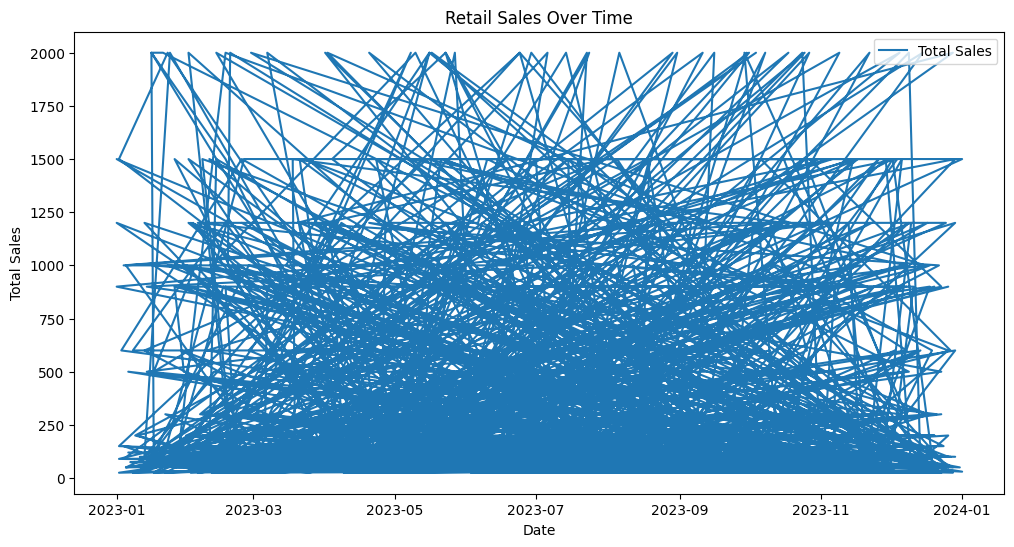

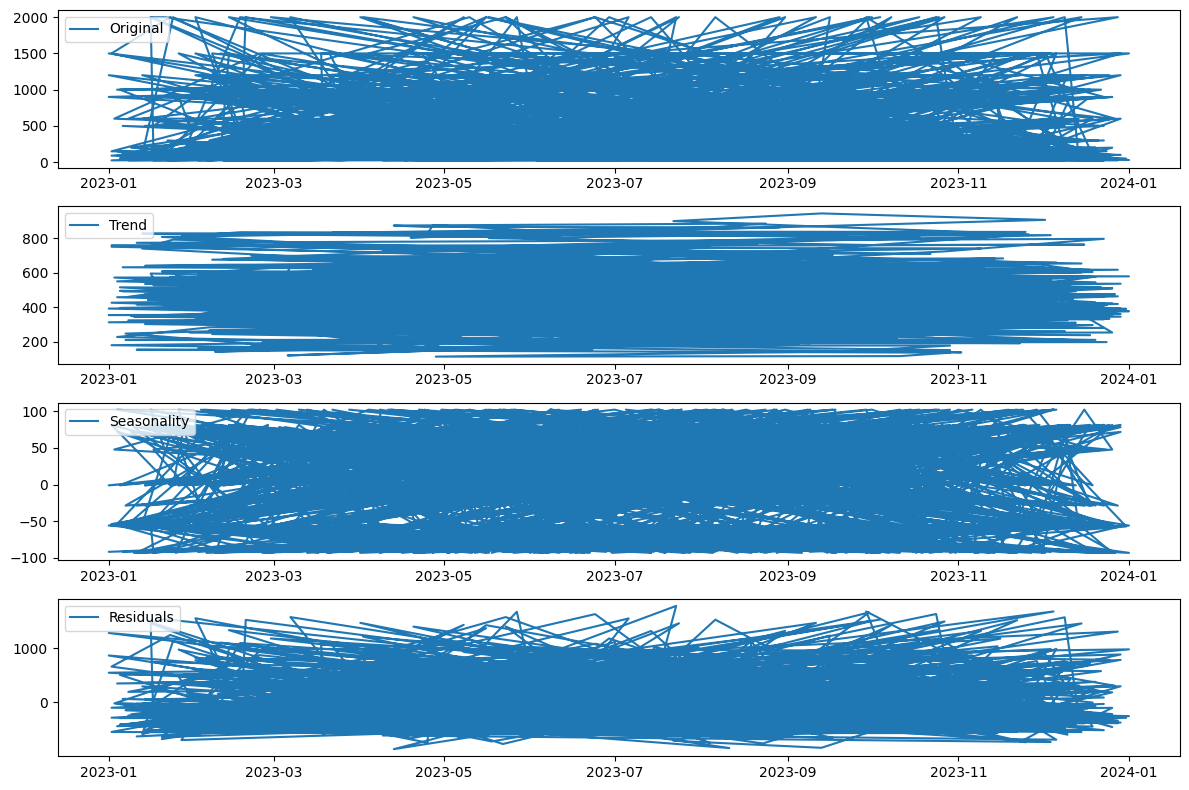

ADF Statistic: -31.776013873379462
p-value: 0.0
Critical Values:
   1%: -3.4369127451400474
   5%: -2.864437475834273
   10%: -2.568312754566378


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Load the Data
df = pd.read_csv('retail_sales_dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Step 2: Visualize the Time Series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Total Amount'], label='Total Sales')
plt.title('Retail Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

# Step 3: Time Series Decomposition
decomposition = seasonal_decompose(df['Total Amount'], period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Total Amount'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Step 4: Statistical Tests for Stationarity
adf_result = adfuller(df['Total Amount'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

# Step 5: Model Selection
# Since the data has clear seasonality, we'll use Seasonal ARIMA (SARIMA) for modeling.

# Step 6: Parameter Estimation
# We'll use grid search to find the optimal parameters for SARIMA.

# Step 7: Model Evaluation
# We'll evaluate the model's performance using metrics such as MSE, MAE, and forecast accuracy measures.

# Step 8: Forecasting
# We'll use the trained SARIMA model to make forecasts for future sales values.

# Step 9: Visualize Forecasts
# We'll plot the observed sales data along with the forecasted values to visualize the model's performance.

# Step 10: Monitor and Update
# Continuously monitor the model's performance and update it as needed with new data or improved techniques.


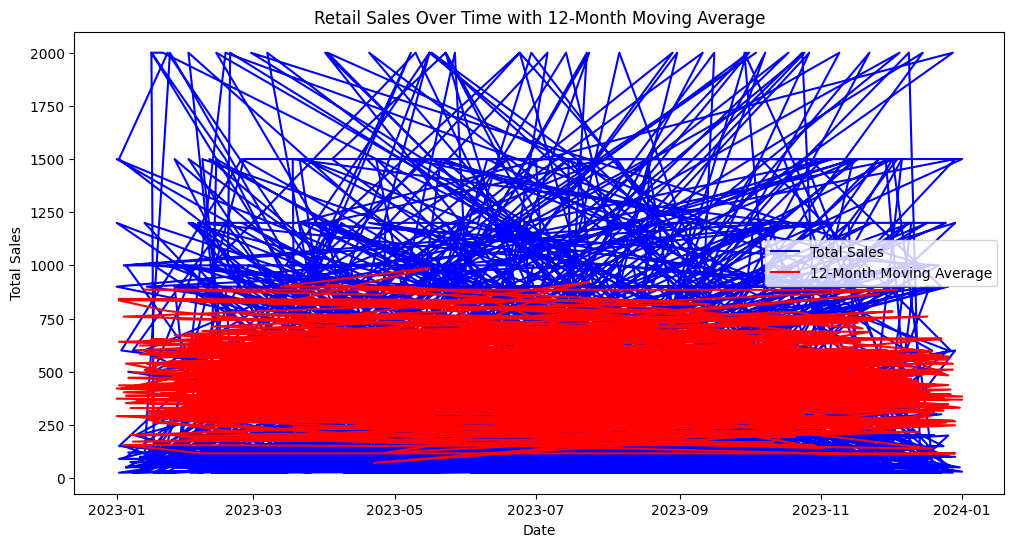

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Data
df = pd.read_csv('retail_sales_dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Step 2: Calculate 12-Month Moving Average
moving_avg = df['Total Amount'].rolling(window=12).mean()

# Step 3: Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Total Amount'], label='Total Sales', color='blue')
plt.plot(moving_avg.index, moving_avg, label='12-Month Moving Average', color='red')
plt.title('Retail Sales Over Time with 12-Month Moving Average')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()



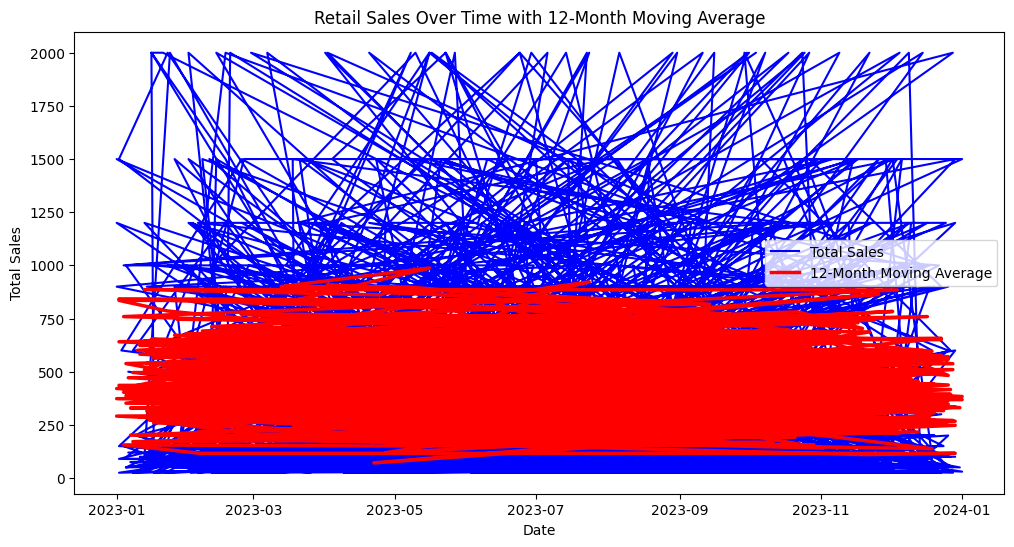

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Data
df = pd.read_csv('retail_sales_dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Step 2: Calculate 12-Month Moving Average
moving_avg = df['Total Amount'].rolling(window=12).mean()

# Step 3: Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Total Amount'], label='Total Sales', color='blue', linewidth=1.5)  # Adjust linewidth for original data
plt.plot(moving_avg.index, moving_avg, label='12-Month Moving Average', color='red', linewidth=2.5)  # Adjust linewidth for moving average
plt.title('Retail Sales Over Time with 12-Month Moving Average')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


Time analytics for Prediction of Trends


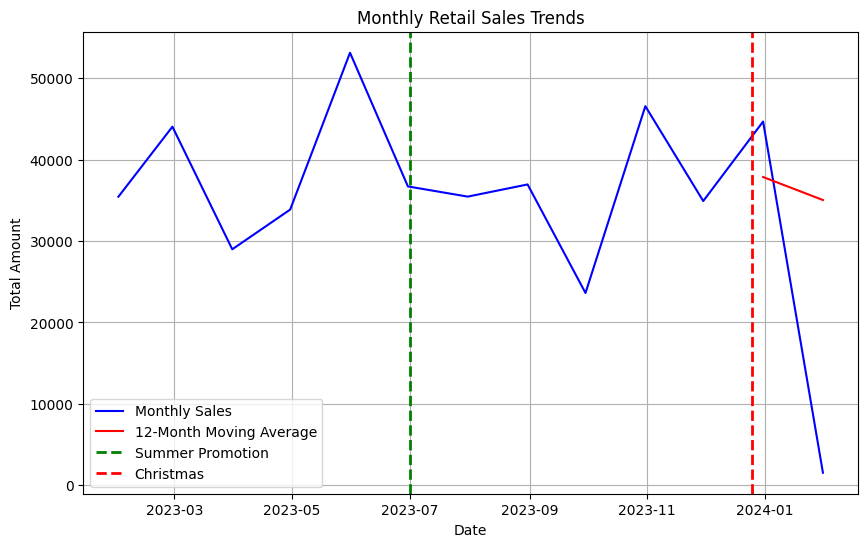

In [19]:
print('Time analytics for Prediction of Trends')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

# Step 1: Data Preparation
# Assuming 'retail_sales_dataset.csv' contains the sales data with 'Date' and 'Total Amount' columns
df = pd.read_csv('retail_sales_dataset.csv', parse_dates=['Date'], index_col='Date')

# Step 2: Data Aggregation
monthly_sales = df.resample('M')['Total Amount'].sum()

# Step 3: Smoothing with Moving Average
rolling_mean = monthly_sales.rolling(window=12).mean()

# Step 4: Data Visualization
plt.figure(figsize=(10, 6))

# Plot actual monthly sales
plt.plot(monthly_sales.index, monthly_sales, color='blue', label='Monthly Sales')

# Plot smoothed trend (moving average)
plt.plot(rolling_mean.index, rolling_mean, color='red', label='12-Month Moving Average')

# Highlight key events or promotions (add additional annotations as needed)
plt.axvline(pd.Timestamp('2023-07-01'), color='green', linestyle='--', linewidth=2, label='Summer Promotion')
plt.axvline(pd.Timestamp('2023-12-25'), color='red', linestyle='--', linewidth=2, label='Christmas')

plt.title('Monthly Retail Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'retail_sales_dataset.csv' contains the sales data with 'Date' and 'Total Amount' columns
df = pd.read_csv('retail_sales_dataset.csv', parse_dates=['Date'], index_col='Date')

# Filter data for the specified period (January 2023 to December 2023)
sales_2023 = df['2023-01-01':'2023-12-31']['Total Amount']

# Calculate the moving average for 2023
rolling_mean_2023 = sales_2023.rolling(window=12).mean()

# Use the last observed value in 2023 as the predicted value for each month in 2024
predicted_sales_2024 = rolling_mean_2023.iloc[-1]

# Create a date range for 2024
dates_2024 = pd.date_range(start='2024-01-01', end='2024-12-31', freq='M')

# Repeat the predicted value for each month in 2024
predicted_sales_2024 = pd.Series([predicted_sales_2024] * len(dates_2024), index=dates_2024)

# Combine actual sales data for 2023 and predicted sales data for 2024
combined_sales = pd.concat([sales_2023, predicted_sales_2024])

# Plot the actual sales data for 2023 and the predicted sales data for 2024
plt.figure(figsize=(10, 6))
plt.plot(combined_sales.index, combined_sales, color='blue', label='Actual Sales 2023')
plt.plot(predicted_sales_2024.index, predicted_sales_2024, color='red', linestyle='--', label='Predicted Sales 2024')
plt.title('Retail Sales Trends: 2023 (Actual) and 2024 (Predicted)')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

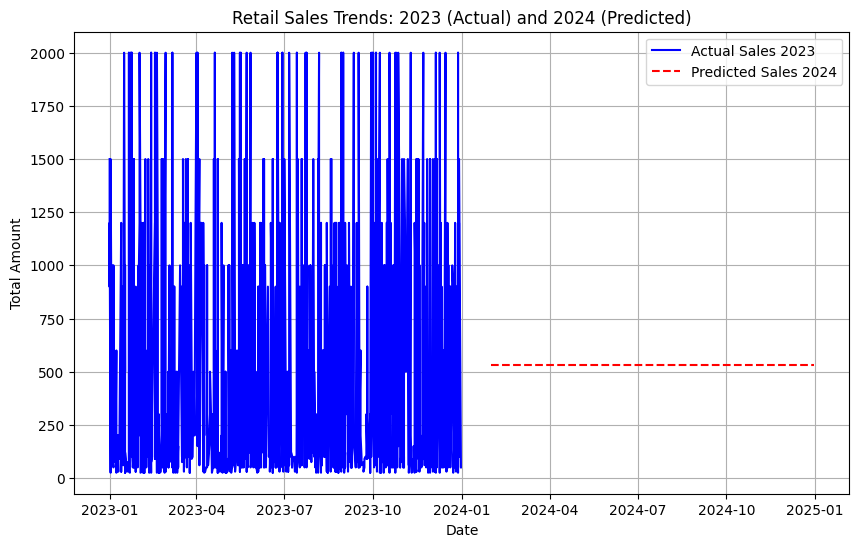

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'retail_sales_dataset.csv' contains the sales data with 'Date' and 'Total Amount' columns
df = pd.read_csv('retail_sales_dataset.csv', parse_dates=['Date'], index_col='Date')

# Sort the DataFrame by the index in ascending order
df = df.sort_index()

# Filter data for the specified period (January 2023 to December 2023)
sales_2023 = df['2023-01-01':'2023-12-31']['Total Amount']

# Calculate the moving average for 2023
rolling_mean_2023 = sales_2023.rolling(window=12).mean()

# Use the last observed value in 2023 as the predicted value for each month in 2024
predicted_sales_2024 = rolling_mean_2023.iloc[-1]

# Create a date range for 2024
dates_2024 = pd.date_range(start='2024-01-01', end='2024-12-31', freq='M')

# Repeat the predicted value for each month in 2024
predicted_sales_2024 = pd.Series([predicted_sales_2024] * len(dates_2024), index=dates_2024)

# Plot the actual sales data for 2023 and the predicted sales data for 2024
plt.figure(figsize=(10, 6))
plt.plot(sales_2023.index, sales_2023, color='blue', label='Actual Sales 2023')
plt.plot(predicted_sales_2024.index, predicted_sales_2024, color='red', linestyle='--', label='Predicted Sales 2024')
plt.title('Retail Sales Trends: 2023 (Actual) and 2024 (Predicted)')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.grid(True)
plt.show()


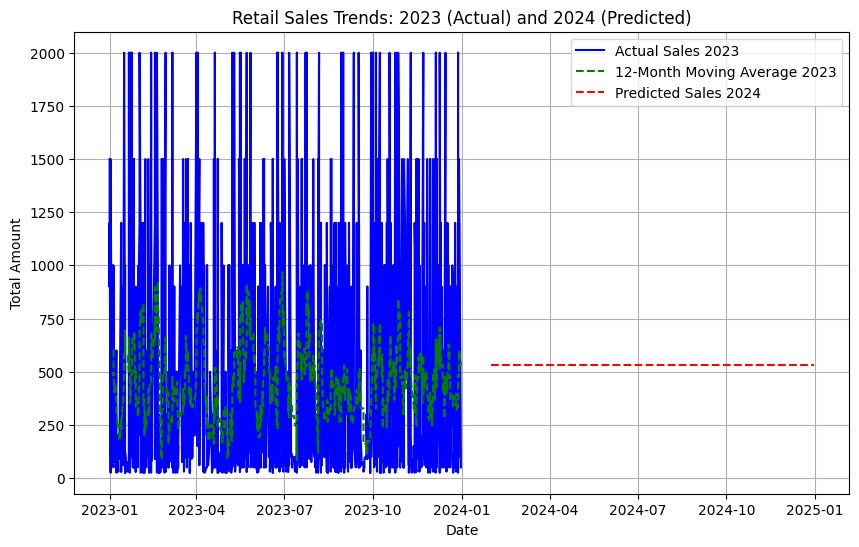

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'retail_sales_dataset.csv' contains the sales data with 'Date' and 'Total Amount' columns
df = pd.read_csv('retail_sales_dataset.csv', parse_dates=['Date'], index_col='Date')

# Sort the DataFrame by the index in ascending order
df = df.sort_index()

# Filter data for the specified period (January 2023 to December 2023)
sales_2023 = df['2023-01-01':'2023-12-31']['Total Amount']

# Calculate the 12-month moving average for 2023
rolling_mean_2023 = sales_2023.rolling(window=12).mean()

# Use the last observed value in 2023 as the predicted value for each month in 2024
predicted_sales_2024 = rolling_mean_2023.iloc[-1]

# Create a date range for 2024
dates_2024 = pd.date_range(start='2024-01-01', end='2024-12-31', freq='M')

# Repeat the predicted value for each month in 2024
predicted_sales_2024 = pd.Series([predicted_sales_2024] * len(dates_2024), index=dates_2024)

# Plot the actual sales data for 2023 and the predicted sales data for 2024
plt.figure(figsize=(10, 6))
plt.plot(sales_2023.index, sales_2023, color='blue', label='Actual Sales 2023')
plt.plot(rolling_mean_2023.index, rolling_mean_2023, color='green', linestyle='--', label='12-Month Moving Average 2023')
plt.plot(predicted_sales_2024.index, predicted_sales_2024, color='red', linestyle='--', label='Predicted Sales 2024')
plt.title('Retail Sales Trends: 2023 (Actual) and 2024 (Predicted)')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.grid(True)
plt.show()





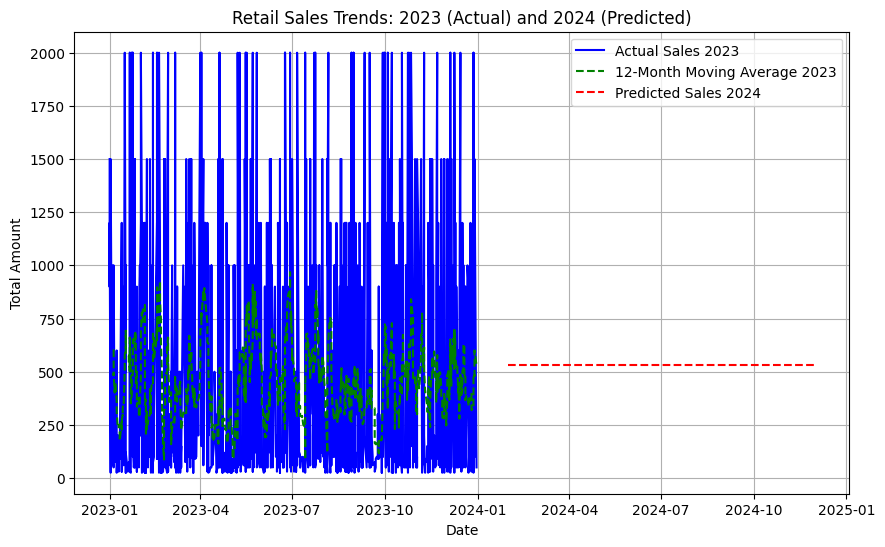

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'retail_sales_dataset.csv' contains the sales data with 'Date' and 'Total Amount' columns
df = pd.read_csv('retail_sales_dataset.csv', parse_dates=['Date'], index_col='Date')

# Sort the DataFrame by the index in ascending order
df = df.sort_index()

# Filter data for the specified period (January 2023 to December 2023)
sales_2023 = df['2023-01-01':'2023-12-31']['Total Amount']

# Calculate the 12-month moving average for 2023
rolling_mean_2023 = sales_2023.rolling(window=12).mean()

# Use the last observed value in 2023 as the predicted value for each group of 2 months in 2024
predicted_sales_2024 = rolling_mean_2023.iloc[-1].repeat(6)

# Create a date range for 2024 with a 2-month gap between groups
dates_2024 = pd.date_range(start='2024-01-01', end='2024-12-31', freq='2M')

# Plot the actual sales data for 2023 and the predicted sales data for 2024
plt.figure(figsize=(10, 6))
plt.plot(sales_2023.index, sales_2023, color='blue', label='Actual Sales 2023')
plt.plot(rolling_mean_2023.index, rolling_mean_2023, color='green', linestyle='--', label='12-Month Moving Average 2023')
plt.plot(dates_2024, predicted_sales_2024, color='red', linestyle='--', label='Predicted Sales 2024')
plt.title('Retail Sales Trends: 2023 (Actual) and 2024 (Predicted)')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.grid(True)
plt.show()


Time analytics for Prediction of Trends


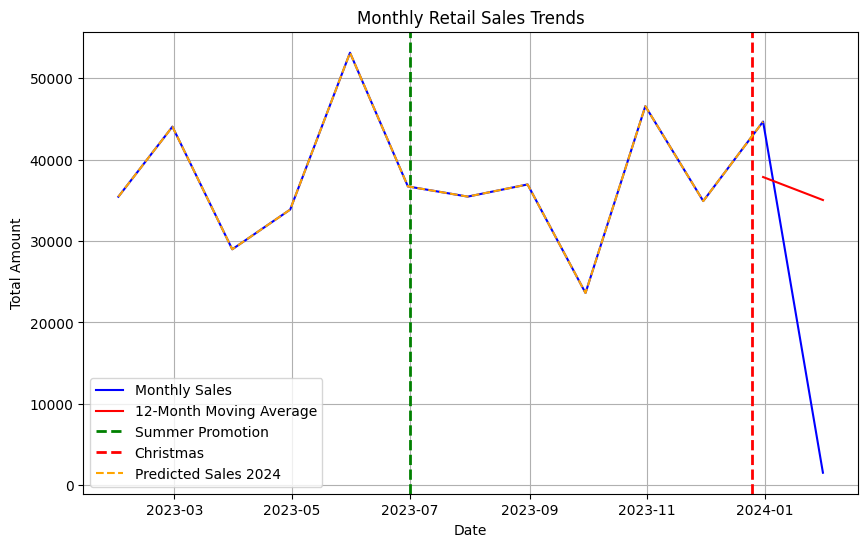

In [24]:
print('Time analytics for Prediction of Trends')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Data Preparation
# Assuming 'retail_sales_dataset.csv' contains the sales data with 'Date' and 'Total Amount' columns
df = pd.read_csv('retail_sales_dataset.csv', parse_dates=['Date'], index_col='Date')

# Step 2: Data Aggregation
monthly_sales = df.resample('M')['Total Amount'].sum()

# Step 3: Smoothing with Moving Average
rolling_mean = monthly_sales.rolling(window=12).mean()

# Step 4: Data Visualization
plt.figure(figsize=(10, 6))

# Plot actual monthly sales
plt.plot(monthly_sales.index, monthly_sales, color='blue', label='Monthly Sales')

# Plot smoothed trend (moving average)
plt.plot(rolling_mean.index, rolling_mean, color='red', label='12-Month Moving Average')

# Highlight key events or promotions (add additional annotations as needed)
plt.axvline(pd.Timestamp('2023-07-01'), color='green', linestyle='--', linewidth=2, label='Summer Promotion')
plt.axvline(pd.Timestamp('2023-12-25'), color='red', linestyle='--', linewidth=2, label='Christmas')

# Predict sales for 2024 based on the previous year
# Use the last 12 months of actual data as the prediction for 2024
predicted_sales_2024 = monthly_sales.loc['2023-01-01':'2023-12-31']

# Plot predicted sales for 2024
plt.plot(predicted_sales_2024.index, predicted_sales_2024, color='orange', linestyle='--', label='Predicted Sales 2024')

plt.title('Monthly Retail Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.grid(True)
plt.show()



Time analytics for Prediction of Trends


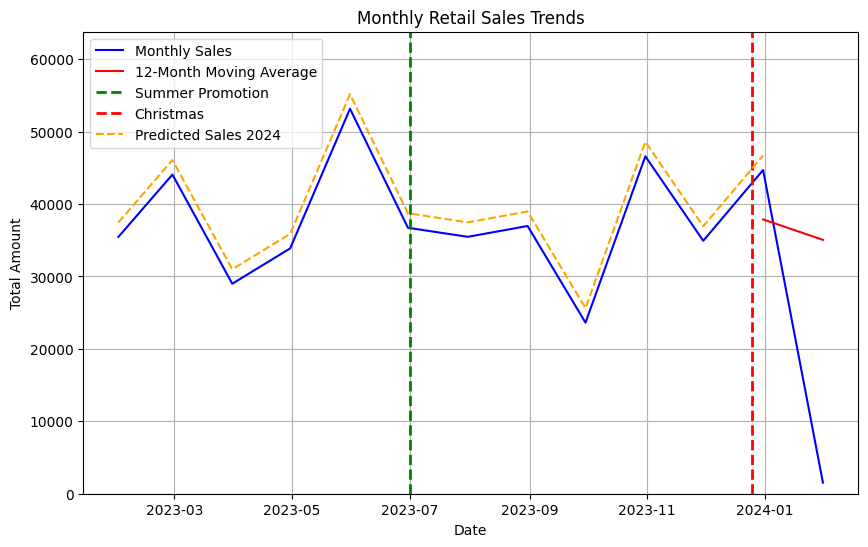

In [25]:
print('Time analytics for Prediction of Trends')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Data Preparation
# Assuming 'retail_sales_dataset.csv' contains the sales data with 'Date' and 'Total Amount' columns
df = pd.read_csv('retail_sales_dataset.csv', parse_dates=['Date'], index_col='Date')

# Step 2: Data Aggregation
monthly_sales = df.resample('M')['Total Amount'].sum()

# Step 3: Smoothing with Moving Average
rolling_mean = monthly_sales.rolling(window=12).mean()

# Step 4: Data Visualization
plt.figure(figsize=(10, 6))

# Plot actual monthly sales
plt.plot(monthly_sales.index, monthly_sales, color='blue', label='Monthly Sales')

# Plot smoothed trend (moving average)
plt.plot(rolling_mean.index, rolling_mean, color='red', label='12-Month Moving Average')

# Highlight key events or promotions (add additional annotations as needed)
plt.axvline(pd.Timestamp('2023-07-01'), color='green', linestyle='--', linewidth=2, label='Summer Promotion')
plt.axvline(pd.Timestamp('2023-12-25'), color='red', linestyle='--', linewidth=2, label='Christmas')

# Predict sales for 2024 based on the previous year
# Use the last 12 months of actual data as the prediction for 2024
predicted_sales_2024 = monthly_sales.loc['2023-01-01':'2023-12-31']

# Plot predicted sales for 2024 with some vertical offset
plt.plot(predicted_sales_2024.index, predicted_sales_2024 + 2000, color='orange', linestyle='--', label='Predicted Sales 2024')

plt.title('Monthly Retail Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.grid(True)

# Adjust y-axis limits to provide more space between lines
plt.ylim([0, monthly_sales.max() * 1.2])

plt.show()


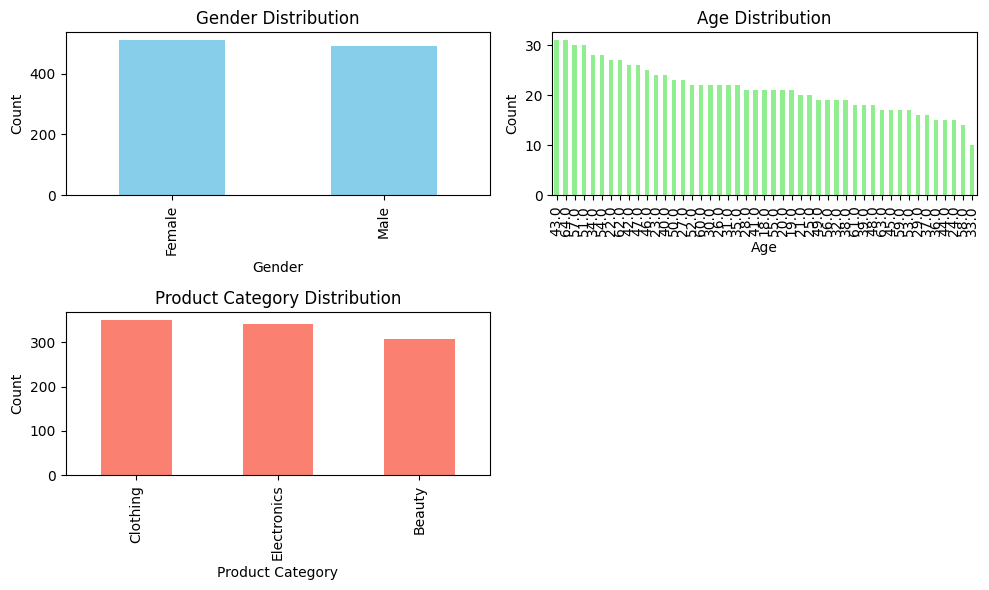

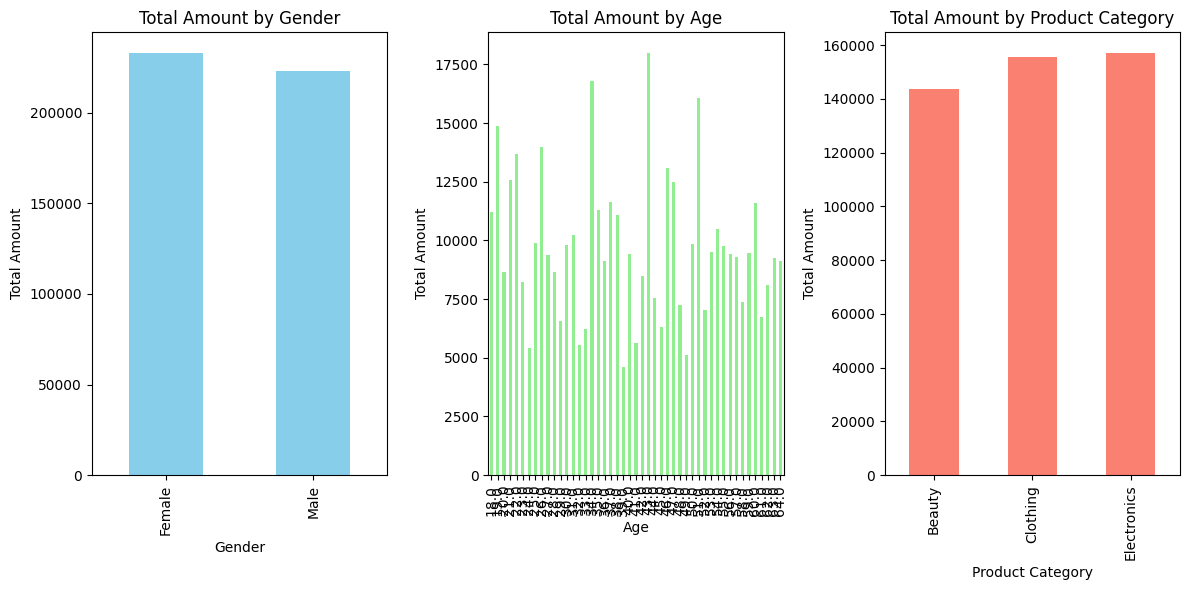

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the retail sales dataset
df = pd.read_csv('retail_sales_dataset.csv')

# Customer demographics analysis
gender_counts = df['Gender'].value_counts()
age_counts = df['Age'].value_counts()
product_category_counts = df['Product Category'].value_counts()

# Plot customer demographics
plt.figure(figsize=(10, 6))

# Gender distribution
plt.subplot(2, 2, 1)
gender_counts.plot(kind='bar', color='skyblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Age distribution
plt.subplot(2, 2, 2)
age_counts.plot(kind='bar', color='lightgreen')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Product category distribution
plt.subplot(2, 2, 3)
product_category_counts.plot(kind='bar', color='salmon')
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Purchasing behavior analysis
total_amount_by_gender = df.groupby('Gender')['Total Amount'].sum()
total_amount_by_age = df.groupby('Age')['Total Amount'].sum()
total_amount_by_product_category = df.groupby('Product Category')['Total Amount'].sum()

# Plot purchasing behavior
plt.figure(figsize=(12, 6))

# Total amount by gender
plt.subplot(1, 3, 1)
total_amount_by_gender.plot(kind='bar', color='skyblue')
plt.title('Total Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')

# Total amount by age
plt.subplot(1, 3, 2)
total_amount_by_age.plot(kind='bar', color='lightgreen')
plt.title('Total Amount by Age')
plt.xlabel('Age')
plt.ylabel('Total Amount')

# Total amount by product category
plt.subplot(1, 3, 3)
total_amount_by_product_category.plot(kind='bar', color='salmon')
plt.title('Total Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')

plt.tight_layout()
plt.show()


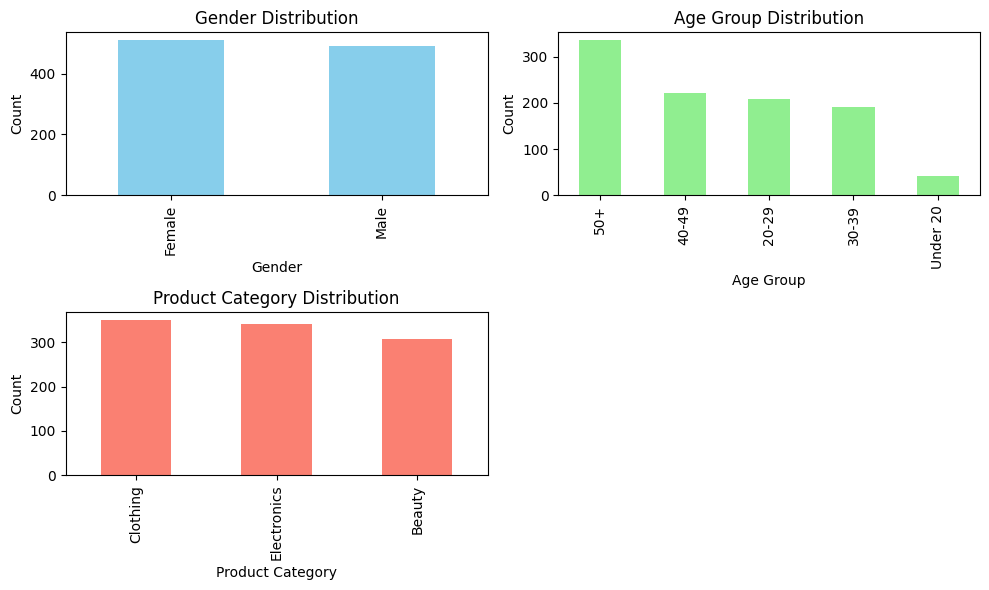

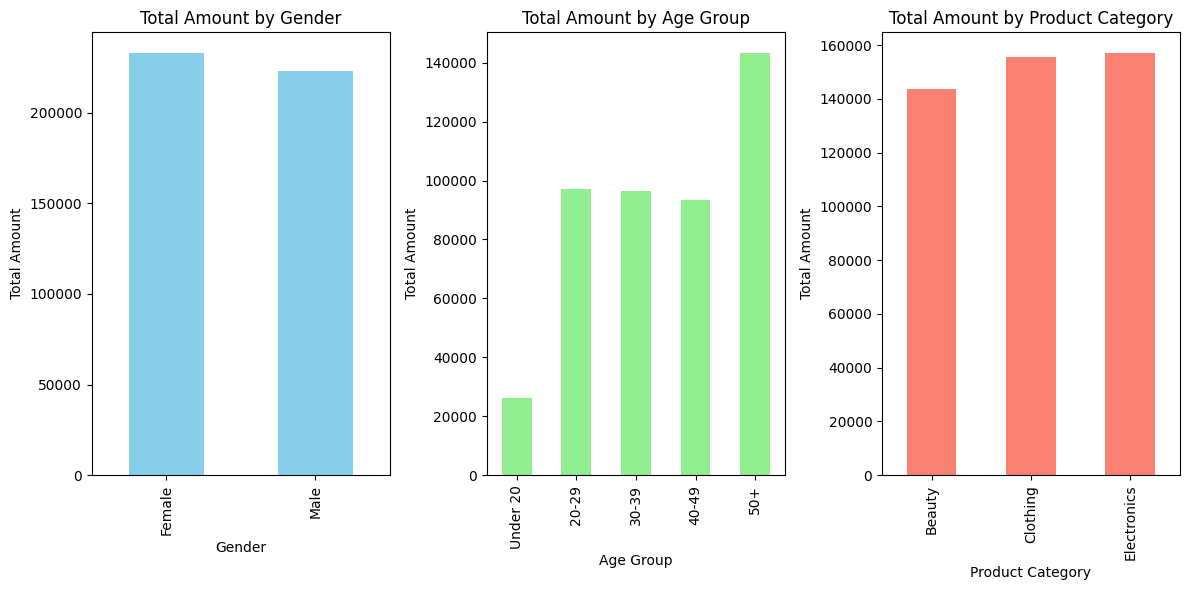

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the retail sales dataset
df = pd.read_csv('retail_sales_dataset.csv')

# Divide age into five age groups
bins = [0, 20, 30, 40, 50, float('inf')]
labels = ['Under 20', '20-29', '30-39', '40-49', '50+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Customer demographics analysis
gender_counts = df['Gender'].value_counts()
age_group_counts = df['Age Group'].value_counts()
product_category_counts = df['Product Category'].value_counts()

# Plot customer demographics
plt.figure(figsize=(10, 6))

# Gender distribution
plt.subplot(2, 2, 1)
gender_counts.plot(kind='bar', color='skyblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Age group distribution
plt.subplot(2, 2, 2)
age_group_counts.plot(kind='bar', color='lightgreen')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Product category distribution
plt.subplot(2, 2, 3)
product_category_counts.plot(kind='bar', color='salmon')
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Purchasing behavior analysis
total_amount_by_gender = df.groupby('Gender')['Total Amount'].sum()
total_amount_by_age_group = df.groupby('Age Group')['Total Amount'].sum()
total_amount_by_product_category = df.groupby('Product Category')['Total Amount'].sum()

# Plot purchasing behavior
plt.figure(figsize=(12, 6))

# Total amount by gender
plt.subplot(1, 3, 1)
total_amount_by_gender.plot(kind='bar', color='skyblue')
plt.title('Total Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')

# Total amount by age group
plt.subplot(1, 3, 2)
total_amount_by_age_group.plot(kind='bar', color='lightgreen')
plt.title('Total Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')

# Total amount by product category
plt.subplot(1, 3, 3)
total_amount_by_product_category.plot(kind='bar', color='salmon')
plt.title('Total Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')

plt.tight_layout()
plt.show()


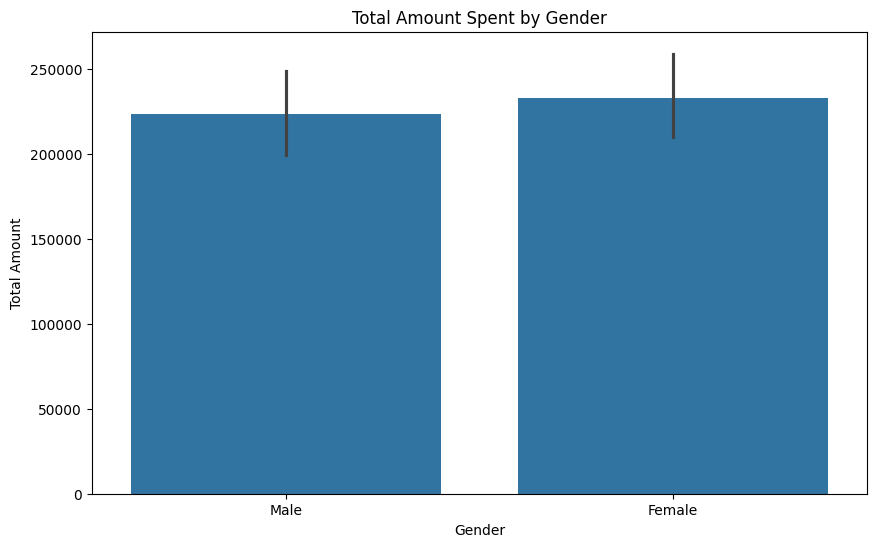

ValueError: Could not interpret value `Age Group` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('retail_sales_dataset.csv')

# Define the bins for age groups
bins = [0, 18, 30, 40, 50, 60, 100]  # Define the age group boundaries
labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60+']  # Define the labels for age groups

# Create a new column 'Age_Group' based on the age bins
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


# Relationship between Gender and Purchasing Behavior
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Gender', y='Total Amount', estimator=sum)
plt.title('Total Amount Spent by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

# Relationship between Age Group and Product Preferences
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age Group', hue='Product Category')
plt.title('Product Preferences by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# Relationship between Age Group and Total Amount Spent
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age Group', y='Total Amount')
plt.title('Total Amount Spent by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.show()

# Relationship between Gender and Product Preferences
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='Product Category')
plt.title('Product Preferences by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Relationship between Customer Loyalty and Total Amount Spent
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Number of Transactions', y='Total Amount')
plt.title('Total Amount Spent vs. Number of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Total Amount')
plt.show()


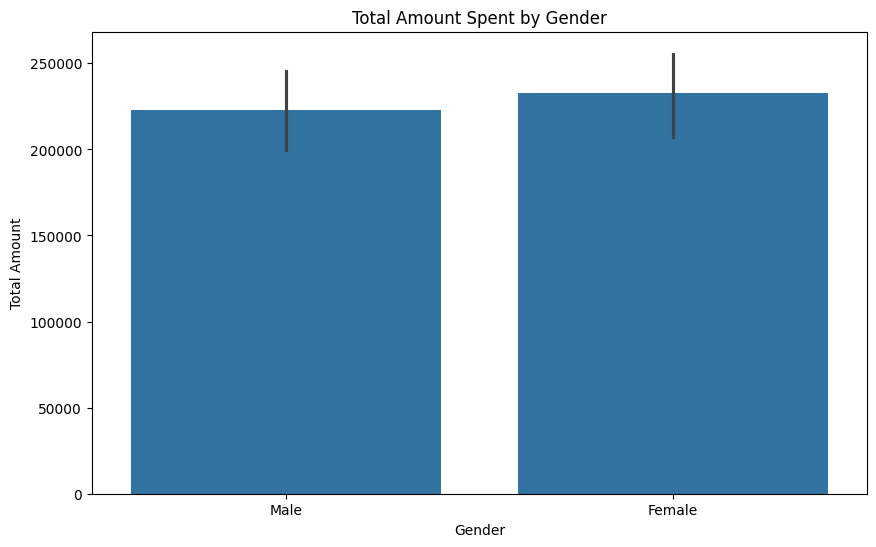

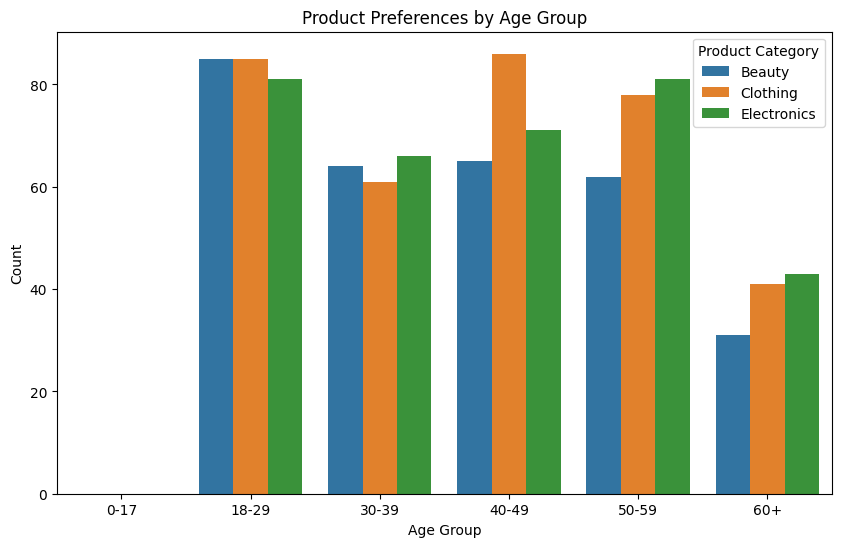

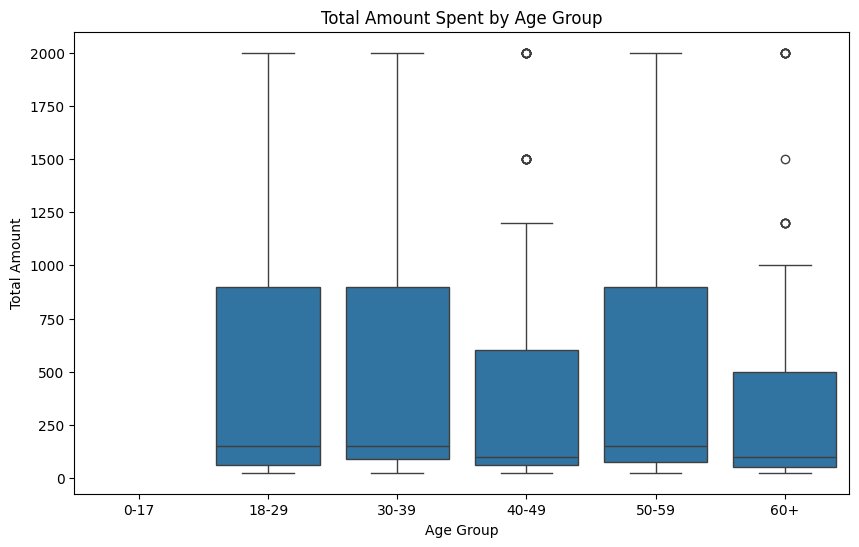

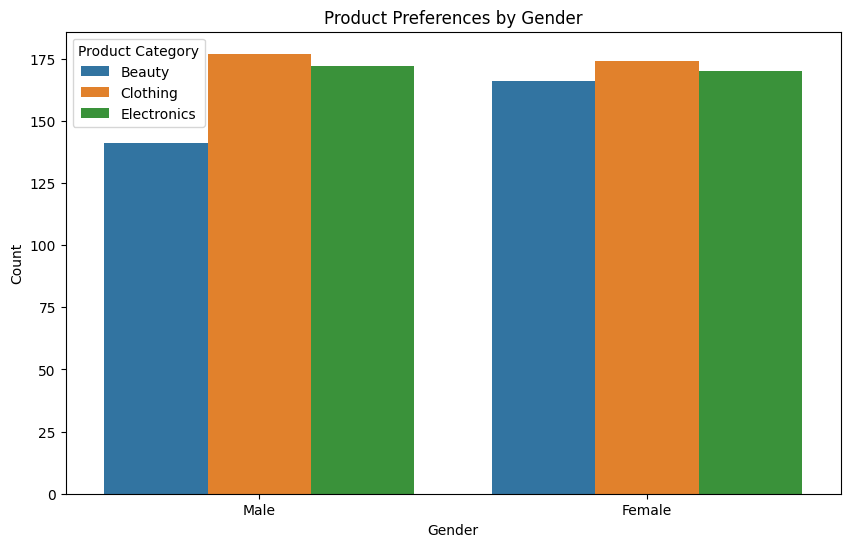

ValueError: Could not interpret value `Number of Transactions` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('retail_sales_dataset.csv')

# Define the bins for age groups
bins = [0, 18, 30, 40, 50, 60, 100]  # Define the age group boundaries
labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60+']  # Define the labels for age groups

# Create a new column 'Age_Group' based on the age bins
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


# Relationship between Gender and Purchasing Behavior
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Gender', y='Total Amount', estimator=sum)
plt.title('Total Amount Spent by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

# Relationship between Age Group and Product Preferences
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age_Group', hue='Product Category')
plt.title('Product Preferences by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# Relationship between Age Group and Total Amount Spent
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age_Group', y='Total Amount')
plt.title('Total Amount Spent by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.show()

# Relationship between Gender and Product Preferences
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='Product Category')
plt.title('Product Preferences by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Relationship between Customer Loyalty and Total Amount Spent
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Number of Transactions', y='Total Amount')
plt.title('Total Amount Spent vs. Number of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Total Amount')
plt.show()


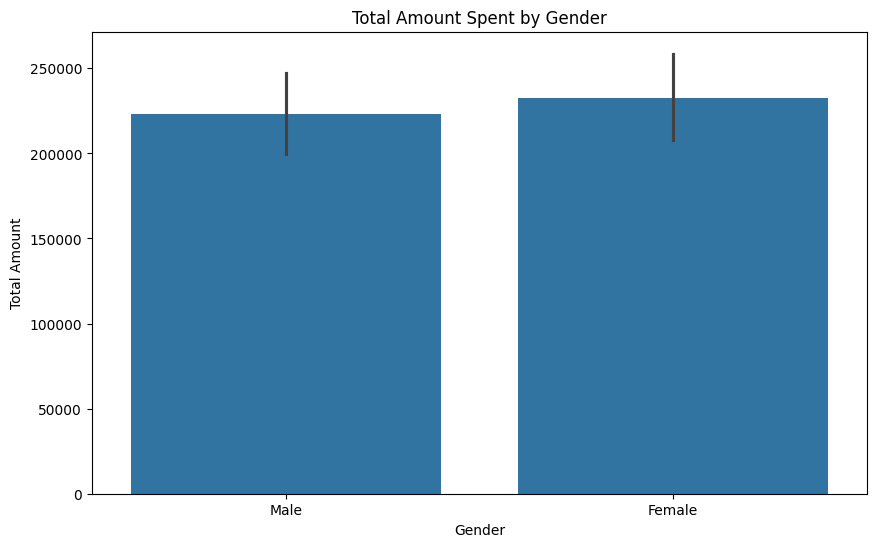

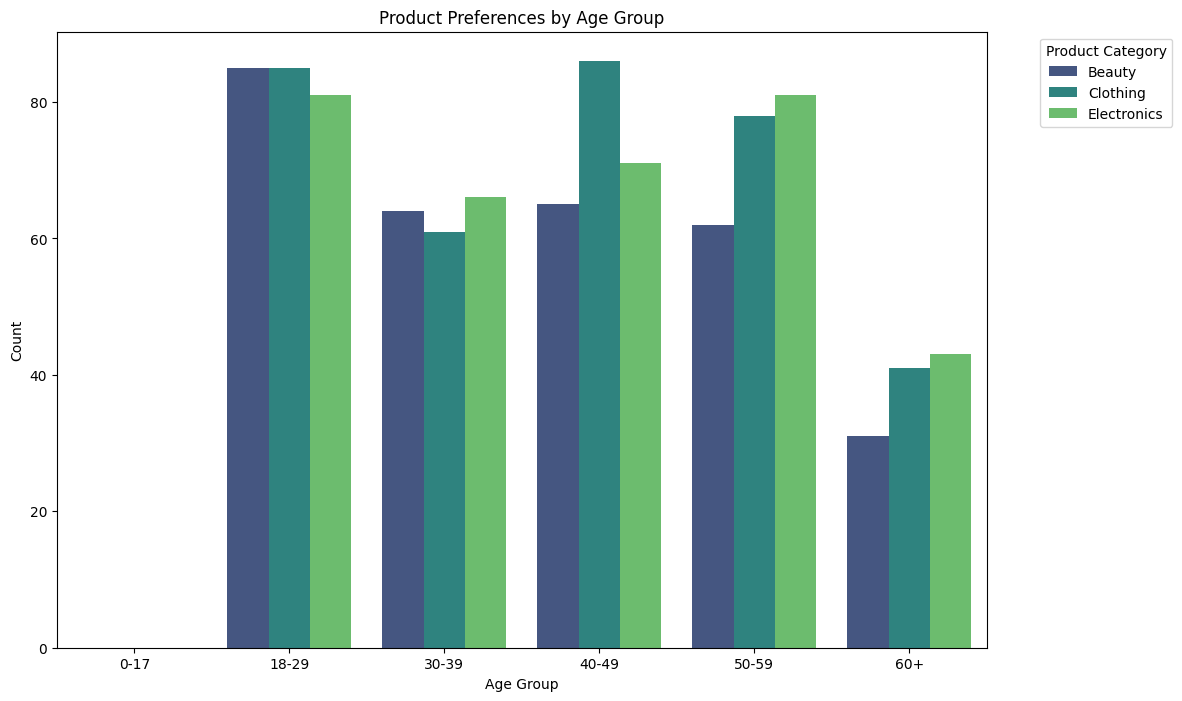

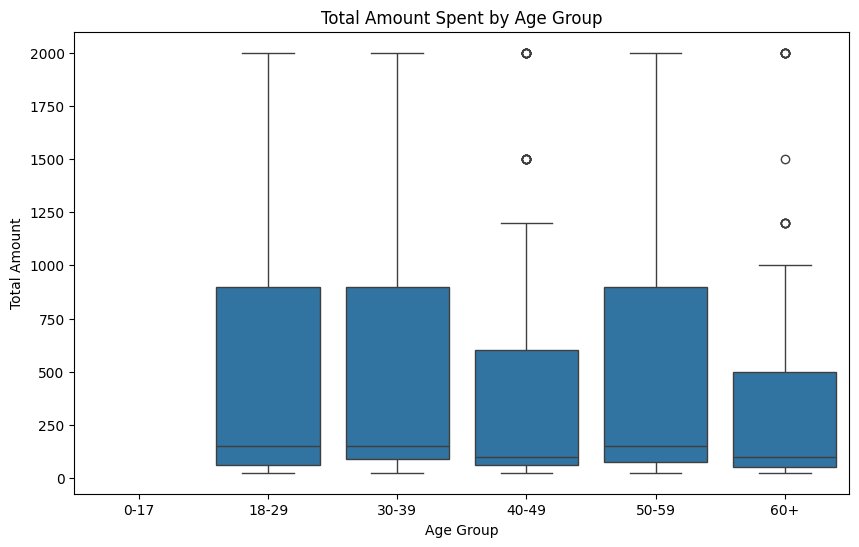

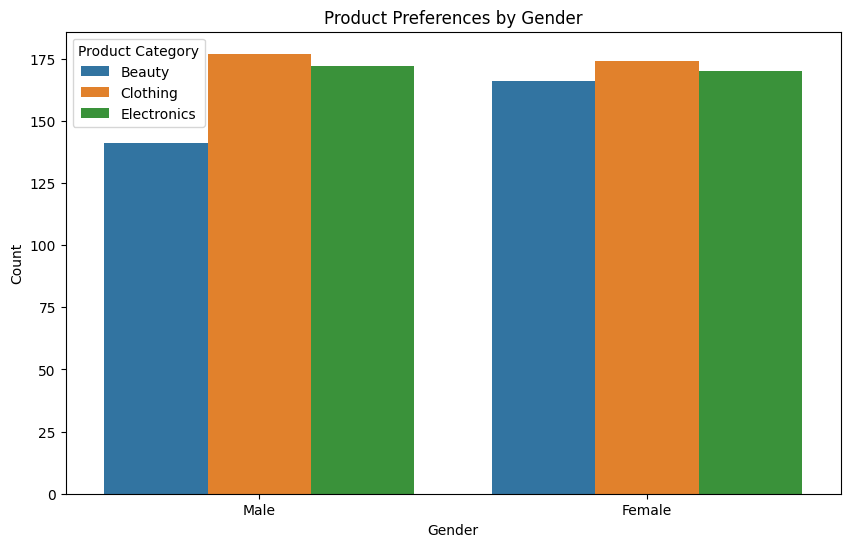

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

<Figure size 1000x600 with 0 Axes>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('retail_sales_dataset.csv')

# Define the bins for age groups
bins = [0, 18, 30, 40, 50, 60, 100]  # Define the age group boundaries
labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60+']  # Define the labels for age groups

# Create a new column 'Age_Group' based on the age bins
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Relationship between Gender and Purchasing Behavior
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Gender', y='Total Amount', estimator=sum)
plt.title('Total Amount Spent by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

# Relationship between Age Group and Product Preferences using a stacked bar plot
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Age_Group', hue='Product Category', palette='viridis')
plt.title('Product Preferences by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Relationship between Age Group and Total Amount Spent
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age_Group', y='Total Amount')
plt.title('Total Amount Spent by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.show()

# Relationship between Gender and Product Preferences
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='Product Category')
plt.title('Product Preferences by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Relationship between Customer Loyalty and Total Amount Spent
# Group by Transaction ID and count the occurrences to represent the number of transactions
transaction_counts = df['Transaction ID'].value_counts()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=transaction_counts, x=transaction_counts.index, y=transaction_counts.values)
plt.title('Total Amount Spent vs. Number of Transactions')
plt.xlabel('Number of Transactions (Transaction ID)')
plt.ylabel('Total Amount')
plt.show()


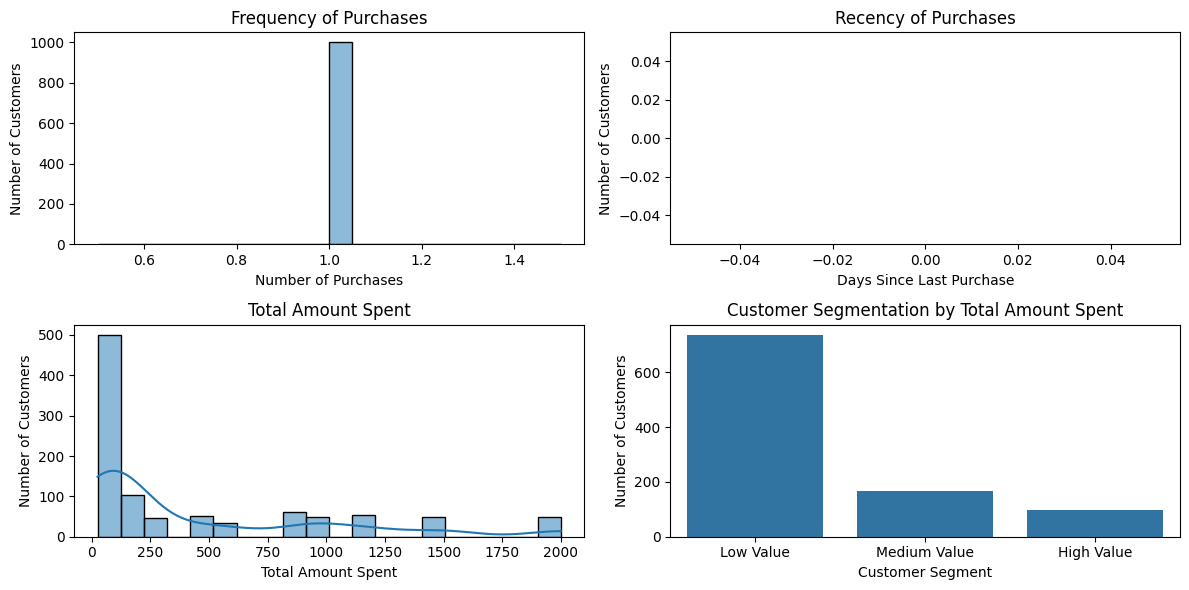

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('retail_sales_dataset.csv')

# Approach 1: Frequency of Purchases
customer_frequency = df['Customer ID'].value_counts()

# Approach 2: Recency of Purchases
# Assuming the dataset is sorted by date
df['Date'] = pd.to_datetime(df['Date'])
df['Time_Since_Last_Purchase'] = df.groupby('Customer ID')['Date'].diff().dt.days

# Approach 3: Total Amount Spent
customer_total_spent = df.groupby('Customer ID')['Total Amount'].sum()

# Approach 4: Customer Segmentation
# Example segmentation based on total amount spent
customer_segments = pd.cut(customer_total_spent, bins=3, labels=['Low Value', 'Medium Value', 'High Value'])

# Approach 5: Predictive Modeling (Not implemented here)

# Approach 6: Surveys and Feedback (Not implemented here)

# Visualizations
plt.figure(figsize=(12, 6))

# Frequency of Purchases
plt.subplot(2, 2, 1)
sns.histplot(customer_frequency, bins=20, kde=True)
plt.title('Frequency of Purchases')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')

# Recency of Purchases
plt.subplot(2, 2, 2)
sns.histplot(df['Time_Since_Last_Purchase'].dropna(), bins=20, kde=True)
plt.title('Recency of Purchases')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')

# Total Amount Spent
plt.subplot(2, 2, 3)
sns.histplot(customer_total_spent, bins=20, kde=True)
plt.title('Total Amount Spent')
plt.xlabel('Total Amount Spent')
plt.ylabel('Number of Customers')

# Customer Segmentation
plt.subplot(2, 2, 4)
sns.countplot(data=df, x=customer_segments)
plt.title('Customer Segmentation by Total Amount Spent')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()


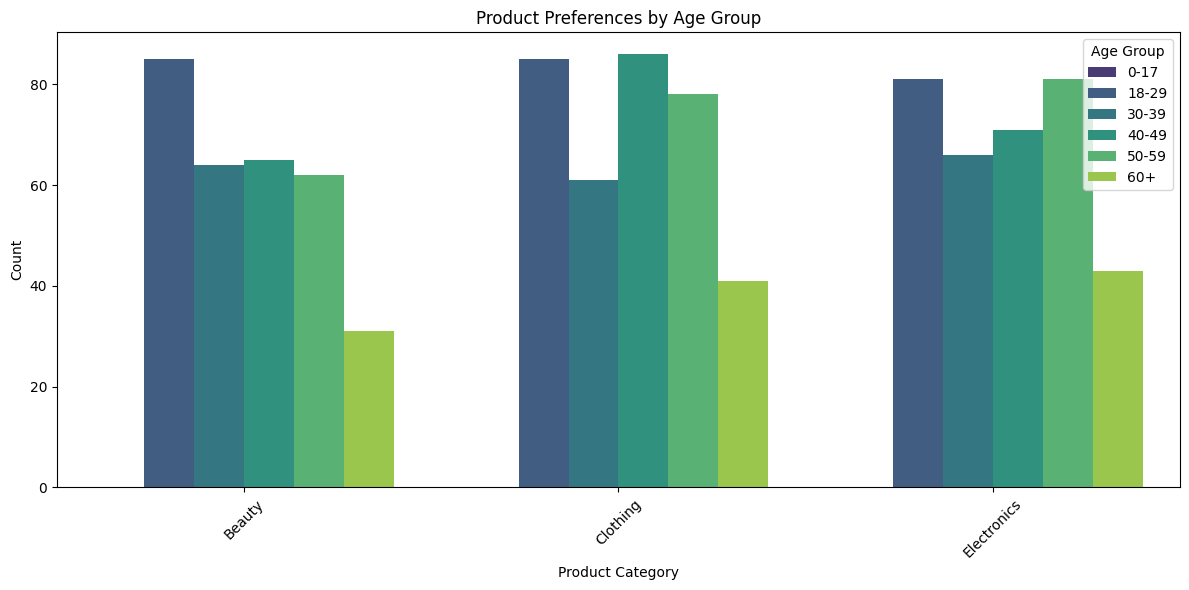

ValueError: Could not interpret value `Age_Group` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('retail_sales_dataset.csv')

# Define the bins for age groups
bins = [0, 18, 30, 40, 50, 60, 100]  # Define the age group boundaries
labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60+']  # Define the labels for age groups

# Create a new column 'Age_Group' based on the age bins
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Product Preferences by Gender and Age Group
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Product Category', hue='Age Group', palette='viridis')
plt.title('Product Preferences by Age Group')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

# Product Preferences by Gender and Age Group
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Product Category', hue='Age_Group', palette='viridis')
plt.title('Product Preferences by Age Group')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

# Average Spending by Gender and Age Group
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Product Category', y='Total Amount', hue='Age_Group', ci=None, estimator=lambda x: sum(x) / len(x))
plt.title('Average Spending by Age Group')
plt.xlabel('Product Category')
plt.ylabel('Average Total Amount')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

# Trend Analysis Over Time
df['Month'] = pd.to_datetime(df['Date']).dt.to_period('M')
monthly_sales = df.groupby(['Month', 'Product Category']).agg({'Total Amount': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total Amount', hue='Product Category')
plt.title('Monthly Sales Trends by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()

# Customer Segmentation (Example using K-means clustering)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features
X = df[['Age', 'Total Amount']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Total Amount', hue='Cluster', palette='Set1', alpha=0.7)
plt.title('Customer Segmentation by Age and Total Amount Spent')
plt.xlabel('Age')
plt.ylabel('Total Amount Spent')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Correlation Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Market Basket Analysis (example using Apriori algorithm)
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Convert categorical variables to one-hot encoding
df_onehot = pd.get_dummies(df[['Transaction ID', 'Product Category']], columns=['Product Category'])

# Perform market basket analysis
frequent_itemsets = apriori(df_onehot.drop(columns=['Transaction ID']), min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.2)

# Visualize association rules
plt.figure(figsize=(12, 6))
sns.scatterplot(data=rules, x='antecedent support', y='consequent support', size='lift', hue='lift', palette='viridis')
plt.title('Association Rules')
plt.xlabel('Antecedent Support')
plt.ylabel('Consequent Support')
plt.tight_layout()
plt.show()


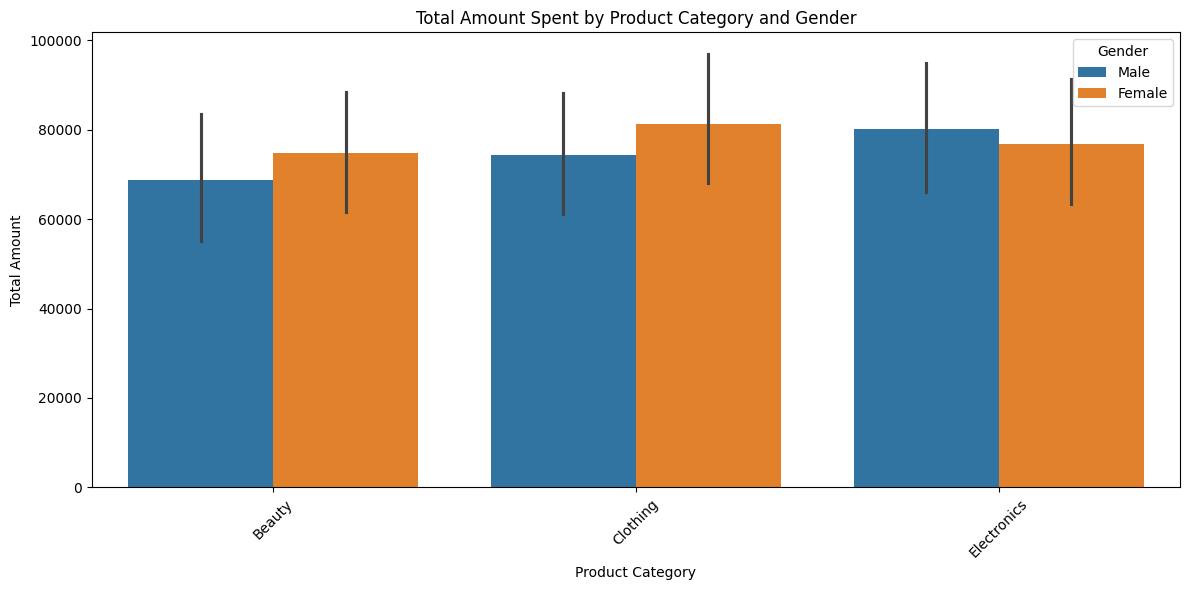

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('retail_sales_dataset.csv')

# Relationship between Gender and Total Amount Spent by Product Category
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Product Category', y='Total Amount', hue='Gender', estimator=sum)
plt.title('Total Amount Spent by Product Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


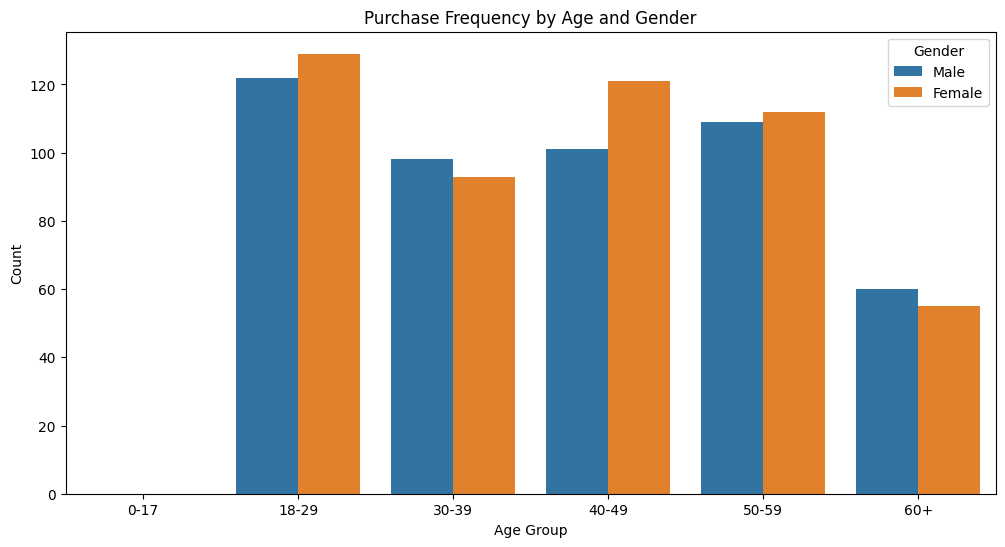

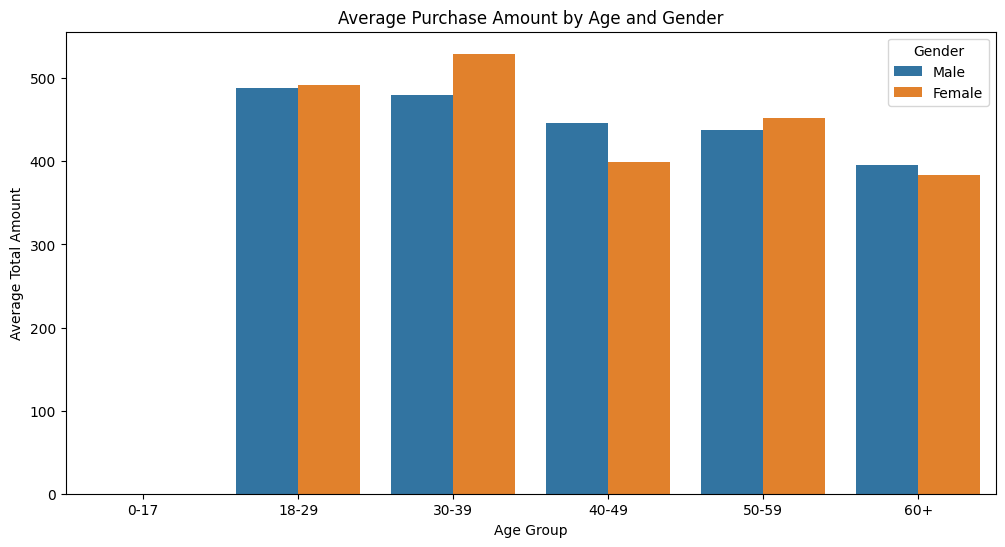

TypeError: Invalid object type at position 0

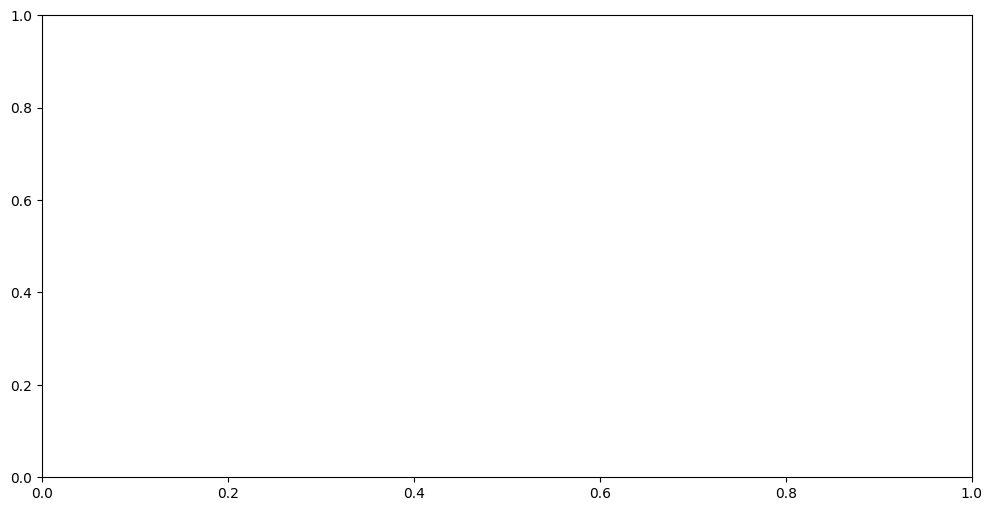

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('retail_sales_dataset.csv')

# Define the bins for age groups
bins = [0, 18, 30, 40, 50, 60, 100]  # Define the age group boundaries
labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60+']  # Define the labels for age groups

# Create a new column 'Age_Group' based on the age bins
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# 1. Purchase Frequency by Age and Gender
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Age Group', hue='Gender')
plt.title('Purchase Frequency by Age and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# 2. Average Purchase Amount by Age and Gender
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Age Group', y='Total Amount', hue='Gender', errorbar=None, estimator='mean')
plt.title('Average Purchase Amount by Age and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Total Amount')
plt.legend(title='Gender')
plt.show()

# 3. Product Preferences Over Time
df['Month'] = pd.to_datetime(df['Date']).dt.to_period('M')
monthly_sales = df.groupby(['Month', 'Product Category']).agg({'Total Amount': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total Amount', hue='Product Category')
plt.title('Monthly Sales Trends by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.legend(title='Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('retail_sales_dataset.csv')



# Remove rows with NaN values in 'Total Amount' column
df.dropna(subset=['Total Amount'], inplace=True)

# Proceed with plotting
monthly_sales = df.groupby(['Month', 'Product Category']).agg({'Total Amount': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total Amount', hue='Product Category')
plt.title('Monthly Sales Trends by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.legend(title='Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: 'Month'

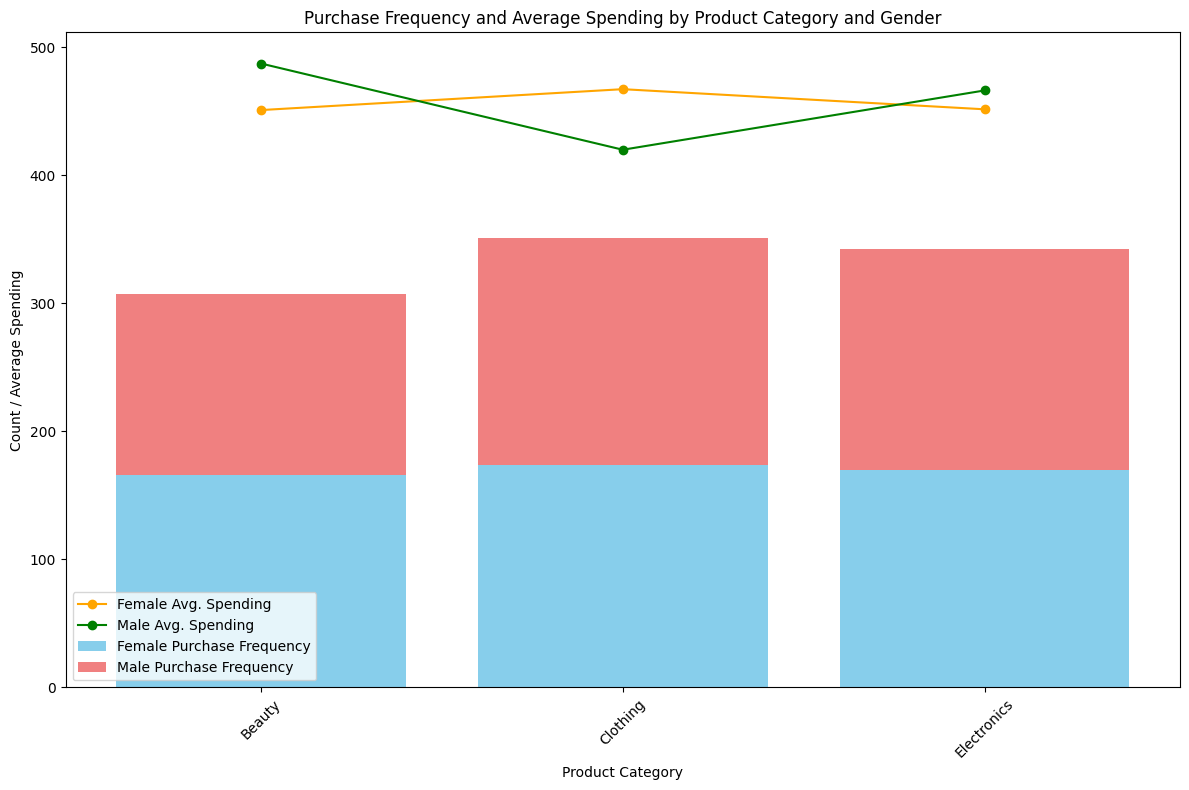

In [12]:


# Calculate purchase frequency by counting the number of transactions for each product category and gender
purchase_frequency = df.groupby(['Product Category', 'Gender']).size().unstack(fill_value=0)

# Calculate average spending for each product category and gender
average_spending = df.groupby(['Product Category', 'Gender'])['Total Amount'].mean().unstack()

# Combine purchase frequency and average spending into a single DataFrame
purchase_analysis = pd.concat([purchase_frequency, average_spending], axis=1)
purchase_analysis.columns = ['Female Frequency', 'Male Frequency', 'Female Avg. Spending', 'Male Avg. Spending']

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot purchase frequency for females
plt.bar(purchase_analysis.index, purchase_analysis['Female Frequency'], color='skyblue', label='Female Purchase Frequency')

# Plot purchase frequency for males
plt.bar(purchase_analysis.index, purchase_analysis['Male Frequency'], bottom=purchase_analysis['Female Frequency'], color='lightcoral', label='Male Purchase Frequency')

# Plot average spending for females
plt.plot(purchase_analysis.index, purchase_analysis['Female Avg. Spending'], color='orange', marker='o', label='Female Avg. Spending')

# Plot average spending for males
plt.plot(purchase_analysis.index, purchase_analysis['Male Avg. Spending'], color='green', marker='o', label='Male Avg. Spending')

# Set labels and title
plt.xlabel('Product Category')
plt.ylabel('Count / Average Spending')
plt.title('Purchase Frequency and Average Spending by Product Category and Gender')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [10]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
df = pd.read_csv('retail_sales_dataset.csv')
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot purchase frequency
plt.bar(purchase_analysis['Product Category'], purchase_analysis['Purchase Frequency'], color='skyblue', label='Purchase Frequency')

# Plot average spending
plt.plot(purchase_analysis['Product Category'], purchase_analysis['Average Spending'], color='orange', marker='o', label='Average Spending')

# Set labels and title
plt.xlabel('Product Category')
plt.ylabel('Count / Average Spending')
plt.title('Purchase Frequency and Average Spending by Product Category')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot purchase frequency
plt.bar(purchase_analysis['Product Category'], purchase_analysis['Purchase Frequency'], color='skyblue', label='Purchase Frequency')

# Plot average spending
plt.plot(purchase_analysis['Product Category'], purchase_analysis['Average Spending'], color='orange', marker='o', label='Average Spending')

# Set labels and title
plt.xlabel('Product Category')
plt.ylabel('Count / Average Spending')
plt.title('Purchase Frequency and Average Spending by Product Category')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


NameError: name 'purchase_analysis' is not defined

<Figure size 1000x600 with 0 Axes>